In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-sales/book_sales.csv
/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv
/kaggle/input/ts-course-data/flu-trends.csv
/kaggle/input/ts-course-data/book_sales.csv
/kaggle/input/ts-course-data/elecdemand.csv
/kaggle/input/ts-course-data/trig.csv
/kaggle/input/ts-course-data/avocados.csv
/kaggle/input/ts-course-data/co2.csv
/kaggle/input/ts-course-data/ar.csv
/kaggle/input/ts-course-data/reserve.csv
/kaggle/input/ts-course-data/us-retail-sales.csv
/kaggle/input/ts-course-data/tunnel.csv


# 1. Time Series - a set of observations recorded over time
**Forecasting** is perhaps the most common application of machine learning in the real world. **Businesses** forecast product demand, **governments** forecast economic and population growth, **meteorologists** forecast the weather. The understanding of things to come is a pressing need across science, government, and industry (not to mention our personal lives!), and practitioners in these fields are increasingly applying machine learning to address this need.

Time series forecasting is a broad field with a long history. This course focuses on the **application of modern machine learning methods** to time series data with the **goal of producing the most accurate predictions**. The lessons in this course were inspired by **winning solutions from past Kaggle forecasting competitions** but will be applicable whenever accurate forecasts are a priority.

know how to:

* engineer features to model the major time series components (trends, seasons, and cycles),
* visualize time series with many kinds of time series plots,
* create forecasting hybrids that combine the strengths of complementary models, and
* adapt machine learning methods to a variety of forecasting tasks.


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/books-sales/book_sales.csv",
                index_col='Date',
                parse_dates=['Date'],
                ).drop('Paperback', axis=1)

In [3]:
df.head()

Hardcover
Date                 
2000-04-01        139
2000-04-02        128
2000-04-03        172
2000-04-04        139
2000-04-05        191

## Forecasting Model using Linear Regression

The equation that represents linear regression:
target = weight_1 * feature_1 + weight_2 * feature_2 + bias
* **target** = the value to forecast.
* **feature_1** and **feature_2** = input features (variables) used to make predictions.
* **weight_1** and **weight_2**: Are the **coefficients** that represent the **importance** (or weight) given to each feature during the prediction process.
* **bias**: Is a constant term (often denoted as 'b' or 'intercept') that is added to the weighted sum of features. It helps to shift the regression line up or down and is independent of the input features.
* Two methods: **Time-step** features and **Lag** features

**Time-step features (Time Dependence Model)**
* time dummy features: Count off time steps in the series from beginning to end
* Lag features

In [4]:
# Time step features - Directly use the time-index column, marking each time step
import numpy as np

df['time_step'] = np.arange(len(df.index))
df

Hardcover  time_step
Date                            
2000-04-01        139          0
2000-04-02        128          1
2000-04-03        172          2
2000-04-04        139          3
2000-04-05        191          4
2000-04-06        168          5
2000-04-07        170          6
2000-04-08        145          7
2000-04-09        184          8
2000-04-10        135          9
2000-04-11        218         10
2000-04-12        198         11
2000-04-13        230         12
2000-04-14        222         13
2000-04-15        206         14
2000-04-16        240         15
2000-04-17        189         16
2000-04-18        222         17
2000-04-19        158         18
2000-04-20        178         19
2000-04-21        217         20
2000-04-22        261         21
2000-04-23        238         22
2000-04-24        240         23
2000-04-25        214         24
2000-04-26        200         25
2000-04-27        201         26
2000-04-28        283         27
2000-04-29        220         28
2000-04-30        259         29

Linear rgression with the time dummy produces the model:   
`target = weight * **time** + bias`   
The time dummy then lets us fit curves to time series in a time plot - Time forms the x-axis

plot the time data

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/2502754448.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


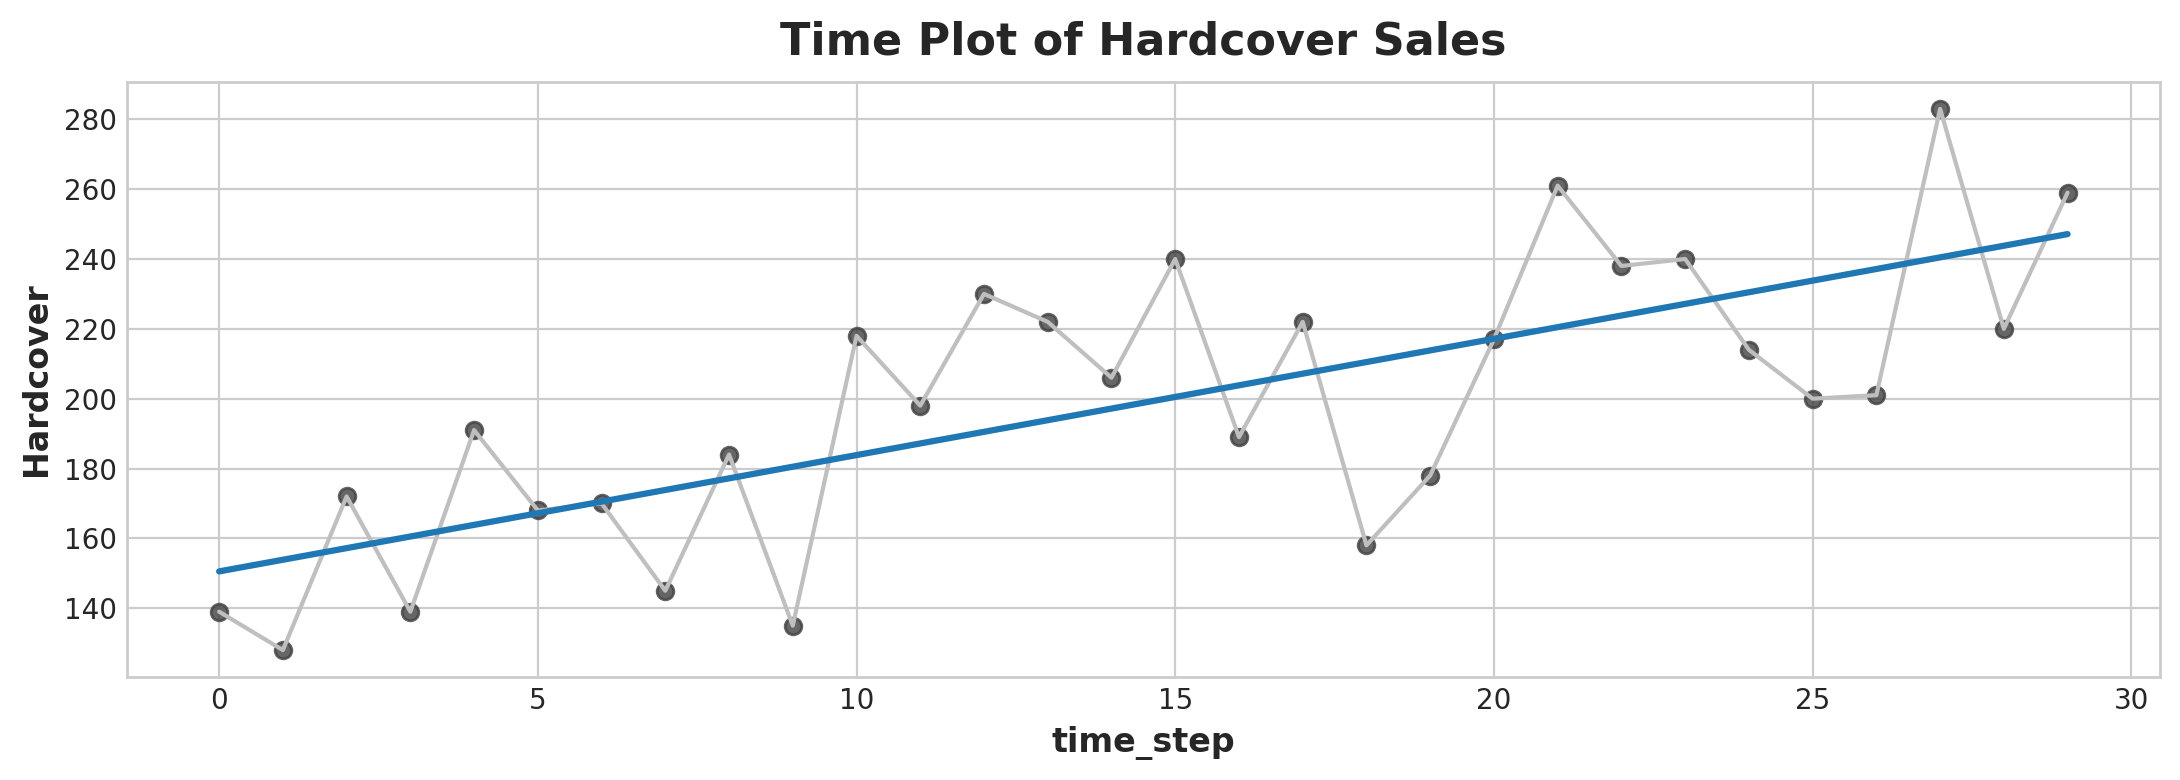

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time_step', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='time_step', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

**Lag features (Serial Dependence)**    
Shift the time step by N to make it looks like it occured later in time. (i.g. 1-step lag ..... multiple-step lag)

In [6]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover','Lag_1']) # rearrange columns w/o time_step
df

Hardcover  Lag_1
Date                        
2000-04-01        139    NaN
2000-04-02        128  139.0
2000-04-03        172  128.0
2000-04-04        139  172.0
2000-04-05        191  139.0
2000-04-06        168  191.0
2000-04-07        170  168.0
2000-04-08        145  170.0
2000-04-09        184  145.0
2000-04-10        135  184.0
2000-04-11        218  135.0
2000-04-12        198  218.0
2000-04-13        230  198.0
2000-04-14        222  230.0
2000-04-15        206  222.0
2000-04-16        240  206.0
2000-04-17        189  240.0
2000-04-18        222  189.0
2000-04-19        158  222.0
2000-04-20        178  158.0
2000-04-21        217  178.0
2000-04-22        261  217.0
2000-04-23        238  261.0
2000-04-24        240  238.0
2000-04-25        214  240.0
2000-04-26        200  214.0
2000-04-27        201  200.0
2000-04-28        283  201.0
2000-04-29        220  283.0
2000-04-30        259  220.0

Linear rgression with a lag feature produces the model:   
`target = weight * **lag** + bias`    
**So lag features let us fit curves to lag plots where each observation in a series is plotted agaginst the previous observation**

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

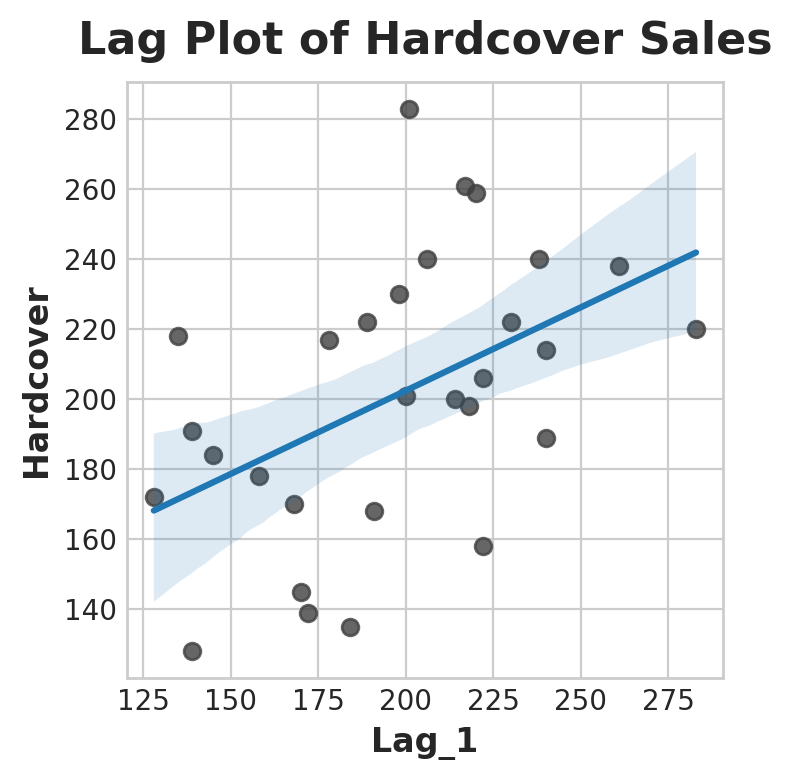

In [7]:
# plot it and check for patterns of correlation between one day
# and the previous data - slope of the linear regression
# Serial Dependence

fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', 
                 data=df, 
                 scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')


You can see from the lag plot that **sales on one day** (Hardcover) are **correlated** with **sales from the previous day** (Lag_1). When you see a relationship like this, you know a lag feature will be useful.

More generally, lag features let you model **serial dependence**. A time series has serial dependence **when an observation can be predicted from previous observations**. In Hardcover Sales, we can predict that high sales on one day usually mean high sales the next day.

> Adapting machine learning algorithms to time series problems is largely about feature engineering with the time index and lags. For most of the course, we use linear regression for its simplicity, but these features will be useful whichever algorithm you choose for your forecasting task.

### Tunnel Traffic (Baregg Tunnel in Switzerland)     
Tunnel Traffic is a time series describing the number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005. In this example, we'll get some practice applying linear regression to time-step features and lag features

In [8]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
tunnel = tunnel.set_index("Day")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
#print(tunnel.index) # before, the index is DatetimeIndex
tunnel = tunnel.to_period()
#print(tunnel.index) # after, now the index is PeriodIndex

tunnel.head()

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569

In [9]:
# Time-step feature
# no missing dates, so create a time dummy

df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

NumVehicles  Time
Day                          
2003-11-01       103536     0
2003-11-02        92051     1
2003-11-03       100795     2
2003-11-04       102352     3
2003-11-05       106569     4

In [10]:
# Fit a linear regression model from scikit-learn
# standard procedures for fitting

from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']] # features (time dummy), return df
y = df.loc[:, 'NumVehicles'] # target, return Series

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index
# as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

"""
Why X is a DataFrame and y is a Series?
X (Features): The variable X represents the features or input variables used for 
training the linear regression model. 
In this case, the feature 'Time' is used as the predictor variable. 
Even though 'Time' is a single column, it is still treated as a feature matrix, 
which is typically represented as a DataFrame with one or more columns. 
In the future, if you decide to use multiple features, you can add 
more columns to X, and it will still be a DataFrame.

y (Target): The variable y represents the target variable, 
i.e., the variable we want to predict using the linear regression
model. It is typically a one-dimensional array-like object, 
which in this case is a Series. 
The Series contains the values of 'NumVehicles', and 
the linear regression model will try to predict these values 
based on the 'Time' feature.
"""


"\nWhy X is a DataFrame and y is a Series?\nX (Features): The variable X represents the features or input variables used for \ntraining the linear regression model. \nIn this case, the feature 'Time' is used as the predictor variable. \nEven though 'Time' is a single column, it is still treated as a feature matrix, \nwhich is typically represented as a DataFrame with one or more columns. \nIn the future, if you decide to use multiple features, you can add \nmore columns to X, and it will still be a DataFrame.\n\ny (Target): The variable y represents the target variable, \ni.e., the variable we want to predict using the linear regression\nmodel. It is typically a one-dimensional array-like object, \nwhich in this case is a Series. \nThe Series contains the values of 'NumVehicles', and \nthe linear regression model will try to predict these values \nbased on the 'Time' feature.\n"

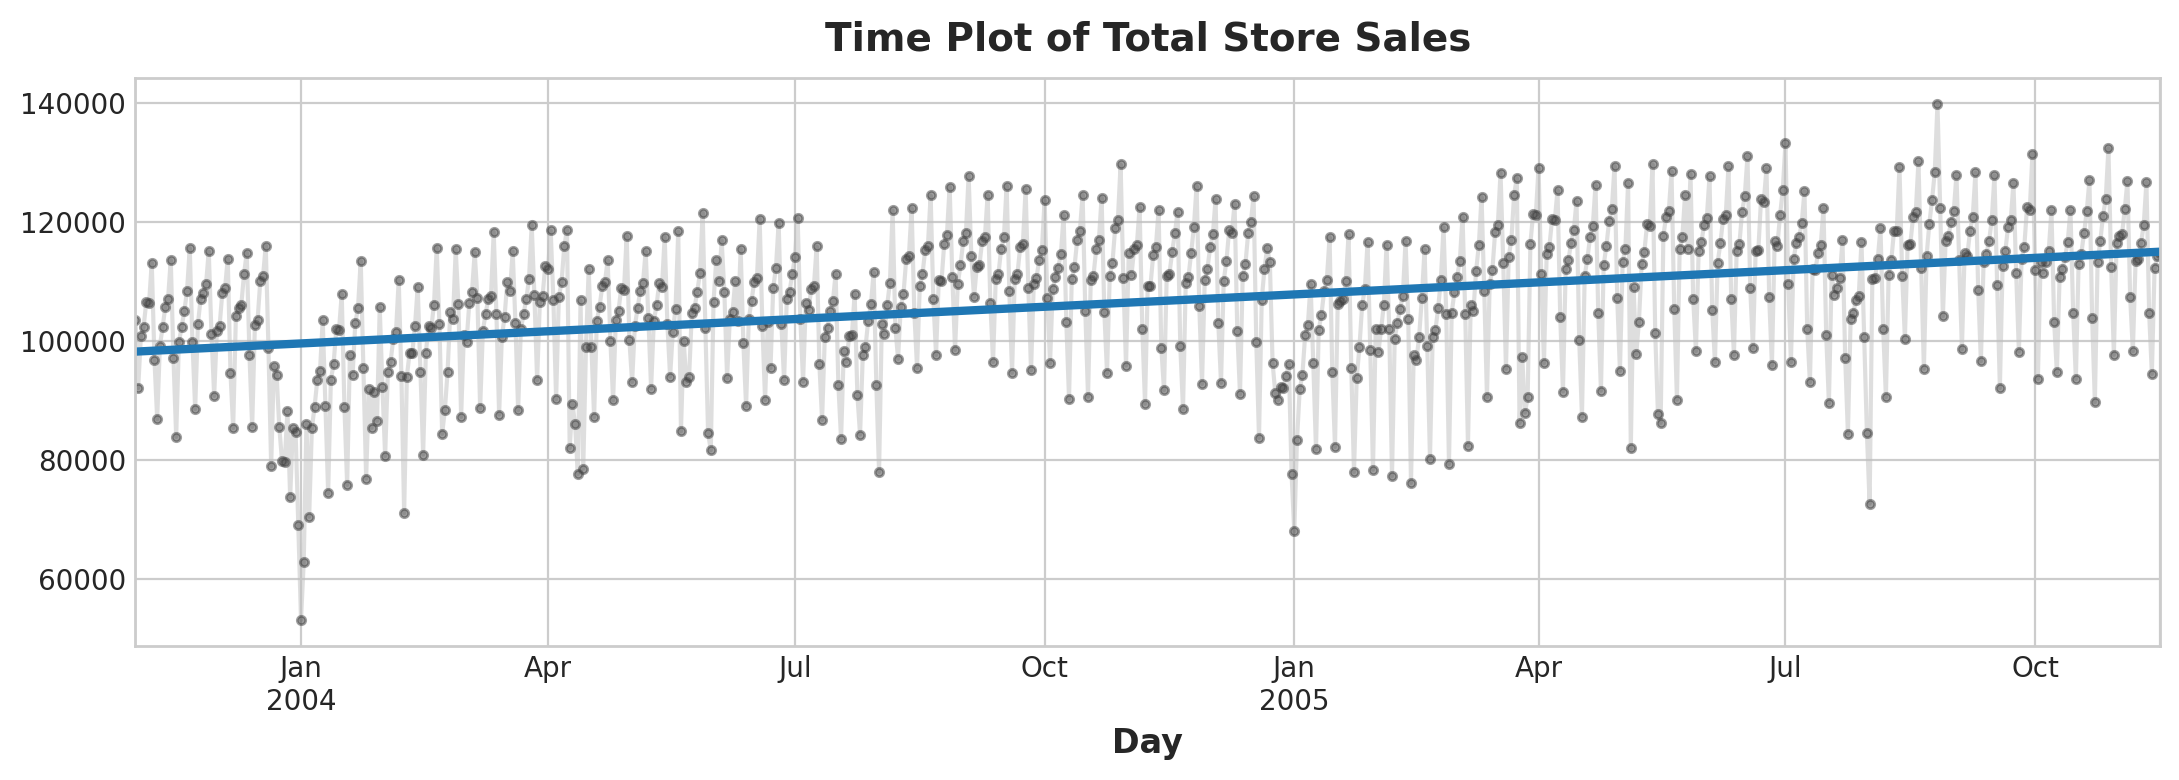

In [11]:
# plot the average sales prediction on Time series

ax = y.plot(**plot_params, alpha=0.5)  # actual data points
ax = y_pred.plot(ax=ax, linewidth=3)  # predictied data points
ax.set_title('Time Plot of Total Store Sales');

In [12]:
# lag features - Series dependence
# Pandas provides a simple method to lag a series, the shift method.

df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

NumVehicles  Time     Lag_1
Day                                    
2003-11-01       103536     0       NaN
2003-11-02        92051     1  103536.0
2003-11-03       100795     2   92051.0
2003-11-04       102352     3  100795.0
2003-11-05       106569     4  102352.0

When creating lag features, we need to decide what to do with the missing values produced. Filling them in is one option, maybe with 0.0 or "backfilling" with the first known value. Instead, we'll just drop the missing values, making sure to also drop values in the target from corresponding dates.

In [13]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']] # create a feature set (df)
X.dropna(inplace=True) # drop missing values - simple choice in this project
y = df.loc[:, 'NumVehicles']  # create a target y (series)
y, X = y.align(X, join='inner') # drop corresponding values in target y
"""
This line ensures that the target variable y and the feature set X 
have the same rows. It aligns the two data structures based on their 
indices, and join='inner' means it keeps only the rows that are 
common in both y and X. This step is necessary to make sure the target 
variable and feature set have corresponding values for training the model.
"""

# model definition, train(fit) and predict with training data
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index) # ensure the result series has the same index

The lag plot shows us how well we were able to fit the relationship between the number of vehicles one day and the number the previous day.

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

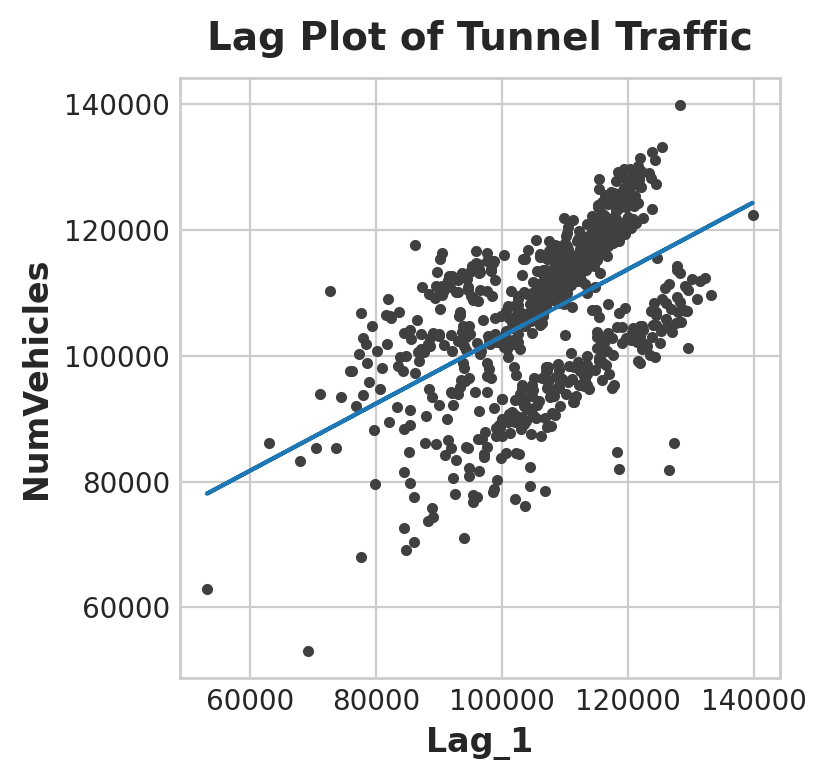

In [14]:
# plot the number of vehicles one day and the previous day

fig, ax = plt.subplots()  # A figure with a set of axes(ax)
ax.plot(X['Lag_1'], y, '.', color='0.25') # scatter plot with dot(.) - (Lag_1, y)
ax.plot(X['Lag_1'], y_pred)  # draw a fitted line for prediction  - (Lag_1, y_pred)

ax.set_aspect('equal') # make the figure square
ax.set_ylabel('NumVehicles') # y label
ax.set_xlabel('Lag_1') # x label
ax.set_title("Lag Plot of Tunnel Traffic") # plot title

What does this prediction from a lag feature mean about how well we can predict the series across time? The following time plot shows us how our forecasts now respond to the behavior of the series in the recent past.

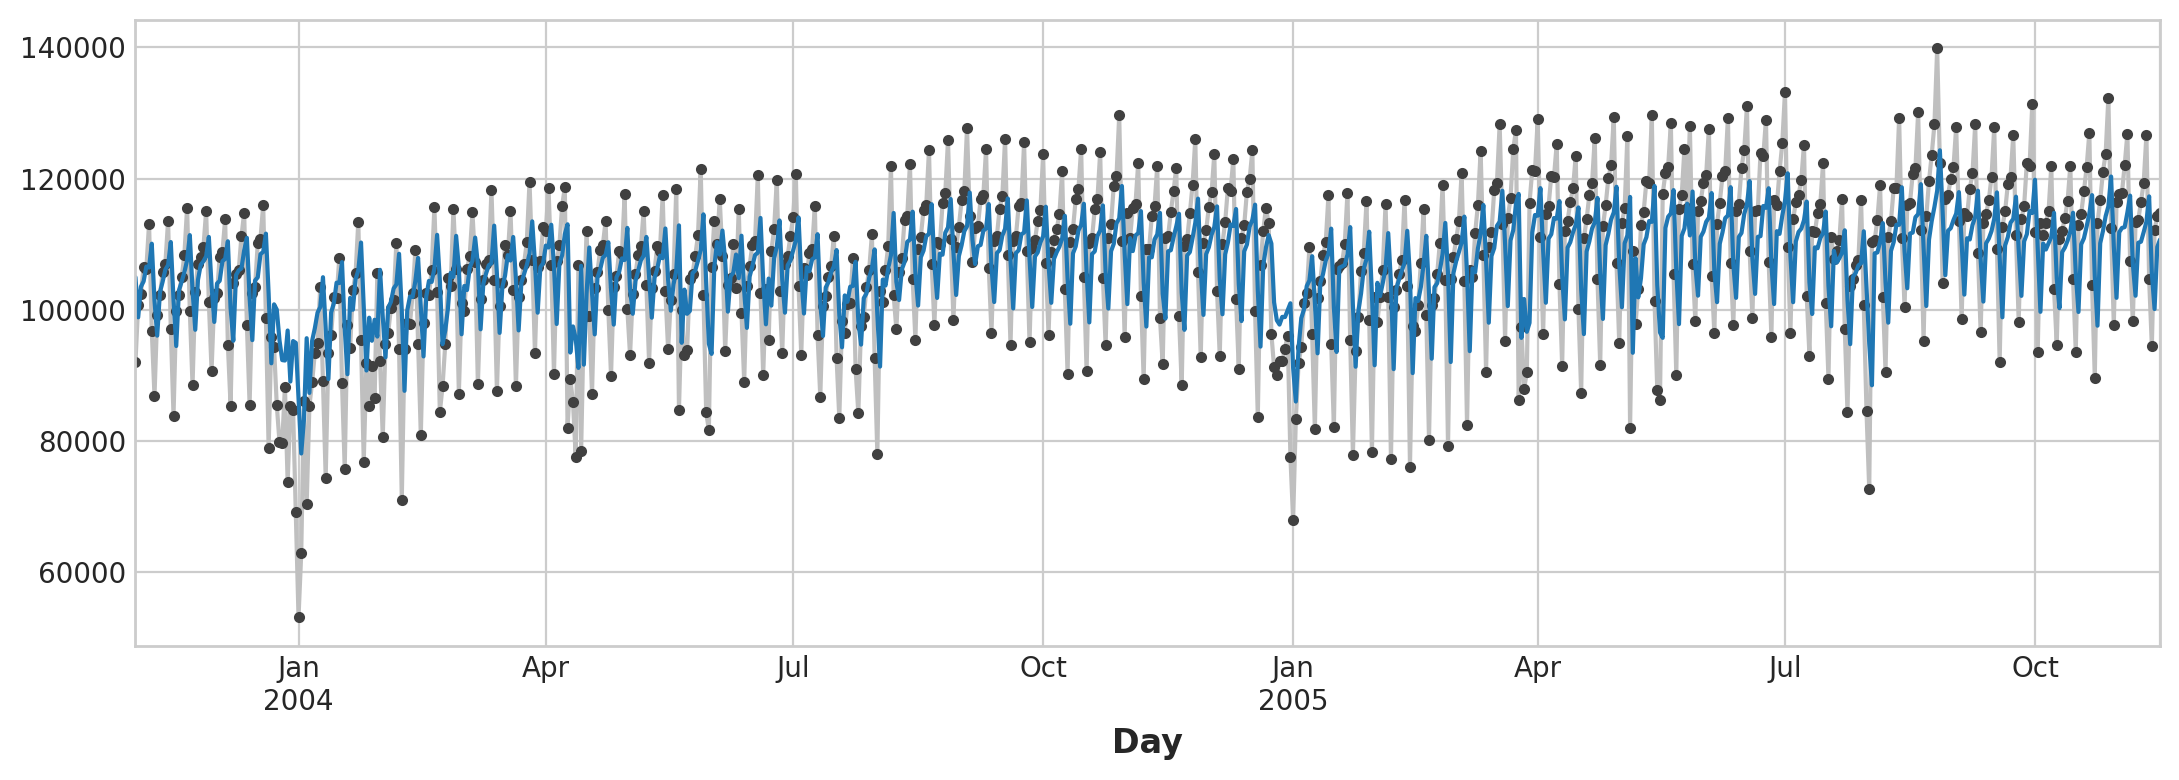

In [15]:
ax = y.plot(**plot_params)
ax = y_pred.plot()   # draw default line plot with the predicted vales onto the same axes.
# the blue line data points are predicted values.

The best time series models usually include **combination** of 
* **time-step** features
* **lag** features

**Exercise: Linear Regression With Time Series**
## Forecasting Store Sales 

**Set-up**

In [16]:
# load modules
from pathlib import Path  # files/directories handling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression  # Time Series model

# load data - two locations / three files
data_dir = Path("../input/ts-course-data/")
comp_dir = Path('../input/store-sales-time-series-forecasting')

# book.sales.csv
# To use one of the column as date(time) index
# Process for time-step features and lag_step(1) features
book_sales = pd.read_csv(
    data_dir / "book_sales.csv",
    index_col="Date",
    parse_dates=["Date"],
).drop("Paperback", axis=1)
book_sales['Time'] = np.arange(len(book_sales.index))  # column for time-step, 0 - 29
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1) # column for lag feature
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])  # column rearrangement - not necessary here, same as its construted already

# ar.csv, train.csv
ar = pd.read_csv(data_dir / 'ar.csv')

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
store_sales = pd.read_csv(
    comp_dir / 'train.csv',  
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales = store_sales.set_index('date').to_period('D')  # set 'date' as index and change to PeriodIndex
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)  # add 'store_nbr', 'family' to the index - now it's MultiIndex of 3
print(store_sales)
average_sales = store_sales.groupby('date').mean()['sales'] # to work later with a seriese of average sales only - 'sales'
print(average_sales)

                                                      id        sales  \
date       store_nbr family                                             
2013-01-01 1         AUTOMOTIVE                        0     0.000000   
                     BABY CARE                         1     0.000000   
                     BEAUTY                            2     0.000000   
                     BEVERAGES                         3     0.000000   
                     BOOKS                             4     0.000000   
...                                                  ...          ...   
2017-08-15 9         POULTRY                     3000883   438.132996   
                     PREPARED FOODS              3000884   154.552994   
                     PRODUCE                     3000885  2419.729004   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000000   
                     SEAFOOD                     3000887    16.000000   

                                                 o

One advantage linear regression has over more complicated algorithms is that the models it creates are **explainable** -- it's easy to interpret what contribution each feature makes to the predictions. In the model `target = weight * feature + bias`, the **weight** tells you by **how much the target changes on average for each unit of change in the feature**.

**Plot with time-step feature and draw regression line**

Text(0.5, 1.0, "Time Plot of 'Hardcover' Sales")

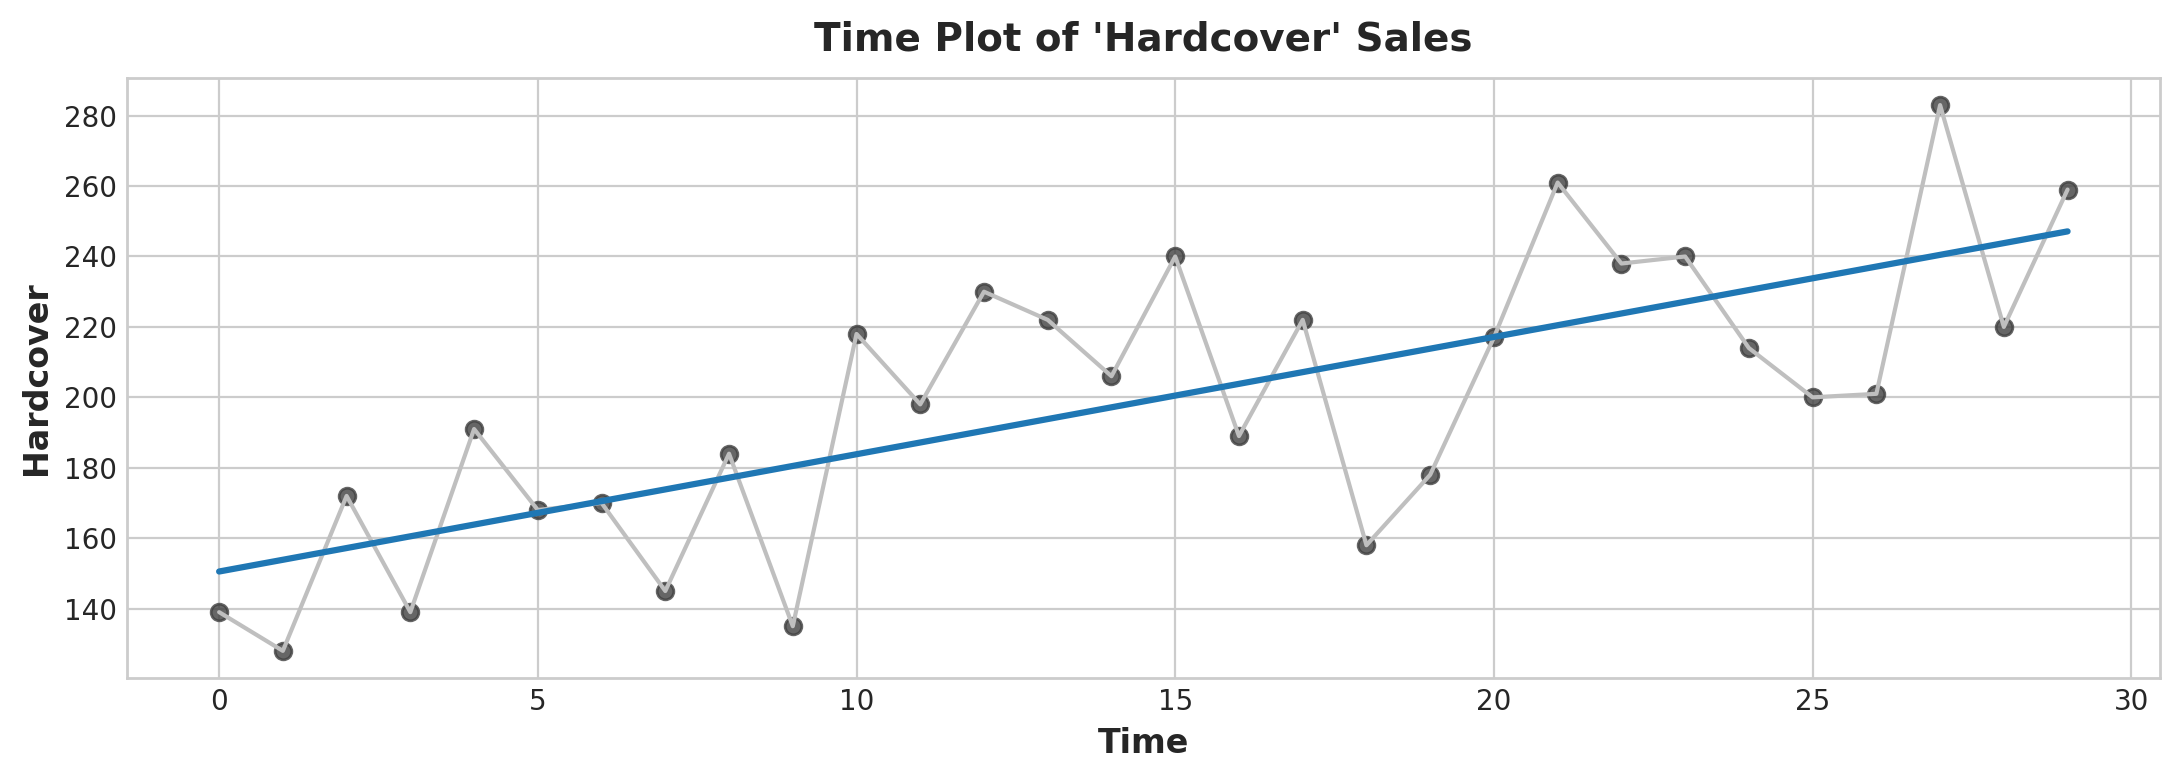

In [17]:
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75') # draw data points
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales, ci=None, scatter_kws=dict(color='0.25'))  # draw regression line on the same plot
ax.set_title("Time Plot of 'Hardcover' Sales")

**1) Interpret linear regression with the time dummy**   
The linear regression line has an equation of (approximately) `Hardcover = 3.33 * Time + 150.5`.    
y = coefficient_ * X + intercept_ == target = weight * feature + bias
When the model is actually fitted with Regression(), you can get the numbers for weight and bias through `model.coefficient_[0]` and `model.intercept_`. **Both are all determined during the model fitting process**.   
   
> **Over 6 days how much on average would you expect hardcover sales to change?**   
A change of 6 steps in Time corresponds to an average change of **6 * 3.33** = 19.98 in Hardcover sales.   
The slope is 3.33, so `Hardcover` will change on average by 3.33 units for every 1 step change in `Time`, according to this model.

**1) Interpret linear regression with a lag feature**   
Interpreting the regression coefficients can help us recognize **serial dependence** in a time plot. Consider the model `target = weight * lag_1 + error`, where error is random noise and weight is a number between -1 and 1. The weight in this case tells you **how likely the next time step will have the same sign as the previous time step**: a weight close to 1 means target will likely have the same sign as the previous step, while a weight close to -1 means target will likely have the opposite sign.

In [18]:
# two series data generated based on the interpretation of lag features
# they were given in a data file ar.csv
ar

ar1       ar2
0   0.541286 -1.234475
1  -1.692950  3.532498
2  -1.730106 -3.915508
3  -0.783524  2.820841
4  -1.796207 -1.084120
..       ...       ...
95 -1.242355  2.675995
96 -1.042621 -1.658682
97 -2.032754  2.647366
98 -2.903010 -1.860723
99 -5.007566  2.429585

[100 rows x 2 columns]

**Plot those two series data stacked**

Text(0.5, 1.0, 'Series 2')

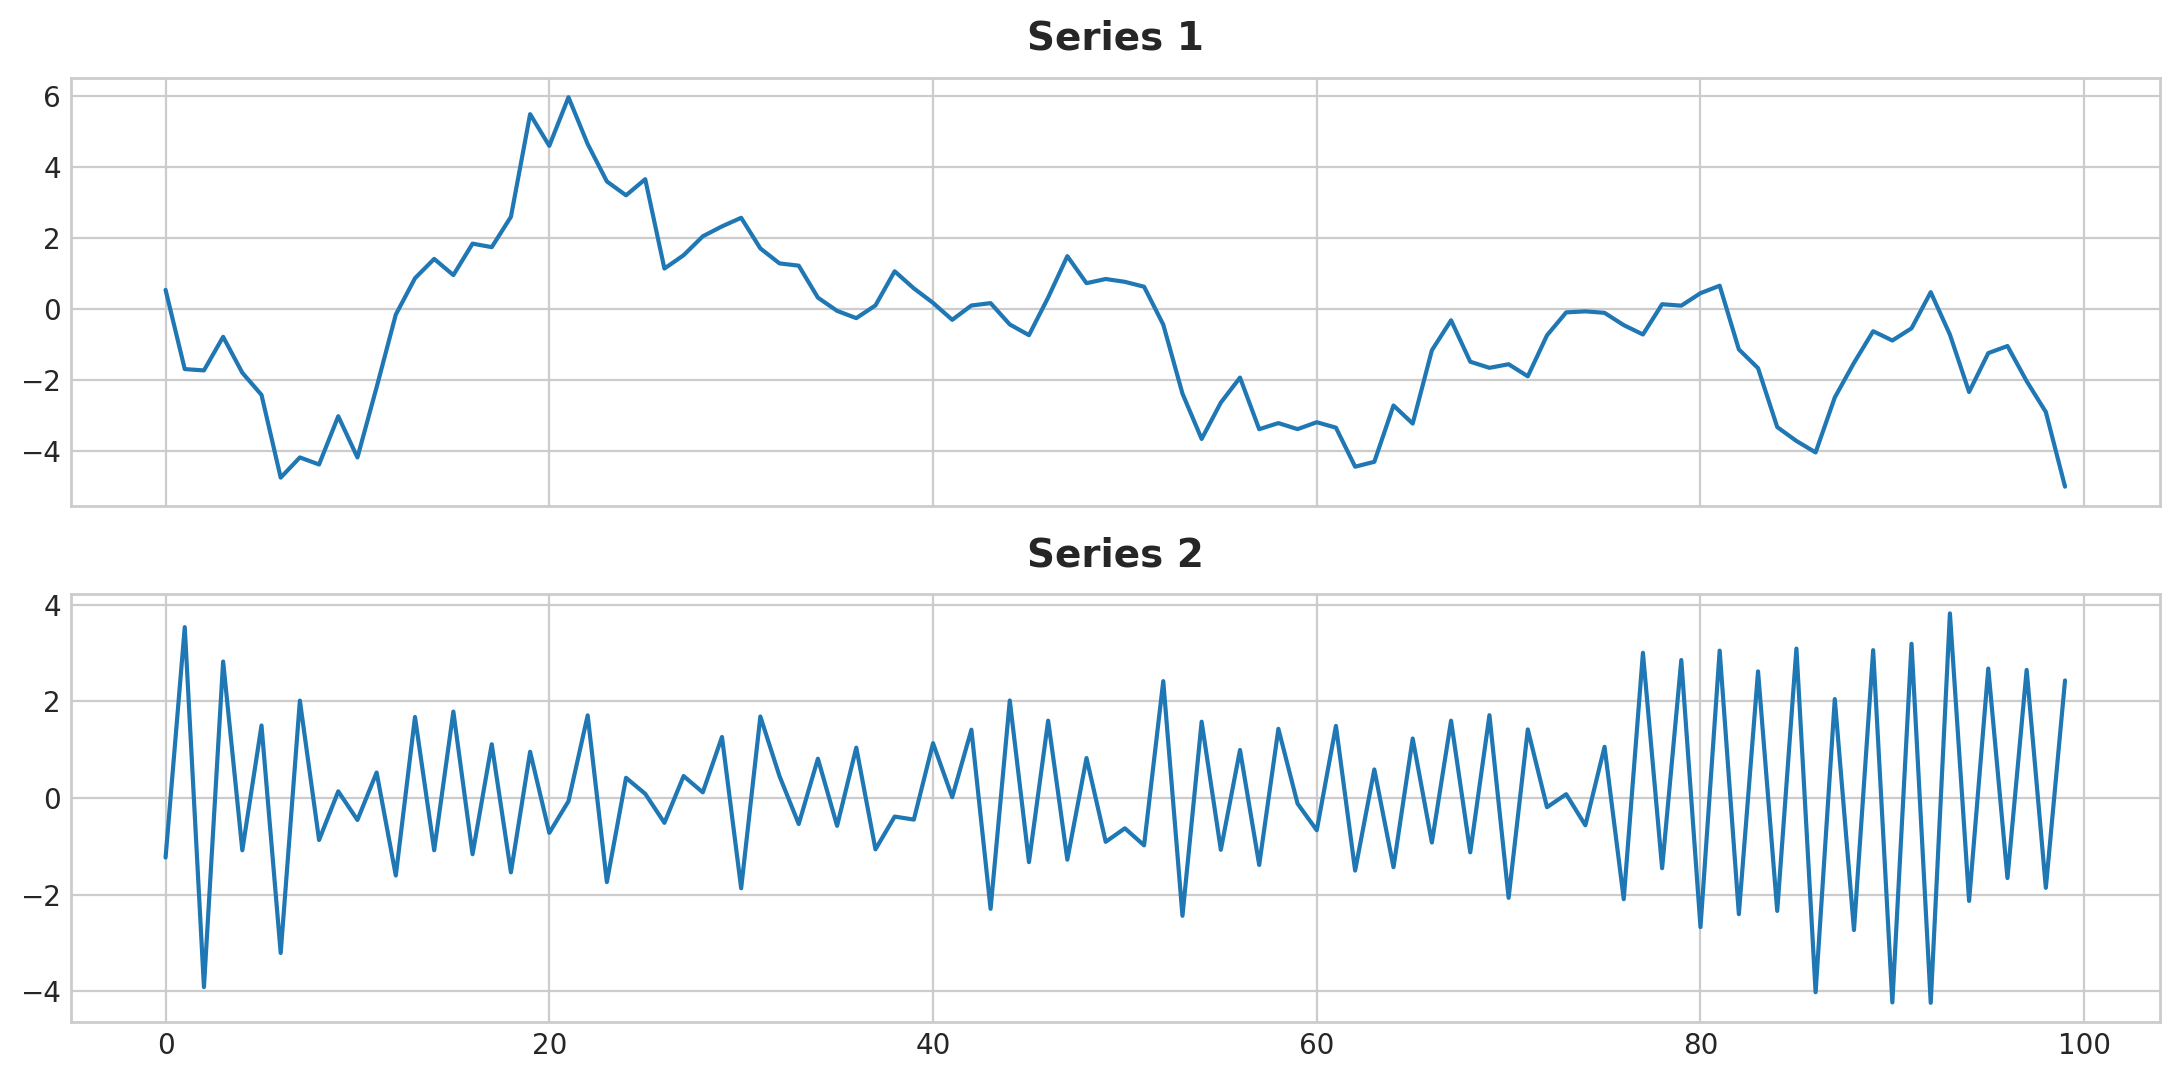

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)

# draw first series ar1
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')

# draw second series ar2
ax2.plot(ar['ar2'])
ax2.set_title('Series 2')

Series 1 was generated by target = 0.95 * lag_1 + error and Series 2 was generated by target = -0.95 * lag_1 + error. The series with the 0.95 weight will tend to have values with signs that stay the same. The series with the -0.95 weight will tend to have values with signs that change back and forth.

### Time Series Forecasting competition data    
Now we'll get started with the Store Sales - Time Series Forecasting competition data. The entire dataset comprises almost 1800 series recording store sales across a variety of product families from 2013 into 2017. For this lesson, we'll just work with a single series (**average_sales**) of the average sales each day.

**3) Create a regression model with a time-step feature**   
* Create on the series of average product sales.
* The target is in a column called 'sales'

In [20]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()  # from Series to df

# Create a time dummy
time = np.arange(len(df.index))

df['time'] = time 

# Create training data
X = df.loc[:, ['time']]  # features
y = df.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index) # numpy.ndarray to Series with the same index as X


"""
Why X is a DataFrame and y is a Series?
X (Features): The variable X represents the features or input variables used for 
training the linear regression model. 
In this case, the feature 'Time' is used as the predictor variable. 
Even though 'Time' is a single column, it is still treated as a feature matrix, 
which is typically represented as a DataFrame with one or more columns. 
In the future, if you decide to use multiple features, you can add 
more columns to X, and it will still be a DataFrame.

y (Target): The variable y represents the target variable, 
i.e., the variable we want to predict using the linear regression
model. It is typically a one-dimensional array-like object, 
which in this case is a Series. 
The Series contains the values of 'NumVehicles', and 
the linear regression model will try to predict these values 
based on the 'Time' feature.
"""


"\nWhy X is a DataFrame and y is a Series?\nX (Features): The variable X represents the features or input variables used for \ntraining the linear regression model. \nIn this case, the feature 'Time' is used as the predictor variable. \nEven though 'Time' is a single column, it is still treated as a feature matrix, \nwhich is typically represented as a DataFrame with one or more columns. \nIn the future, if you decide to use multiple features, you can add \nmore columns to X, and it will still be a DataFrame.\n\ny (Target): The variable y represents the target variable, \ni.e., the variable we want to predict using the linear regression\nmodel. It is typically a one-dimensional array-like object, \nwhich in this case is a Series. \nThe Series contains the values of 'NumVehicles', and \nthe linear regression model will try to predict these values \nbased on the 'Time' feature.\n"

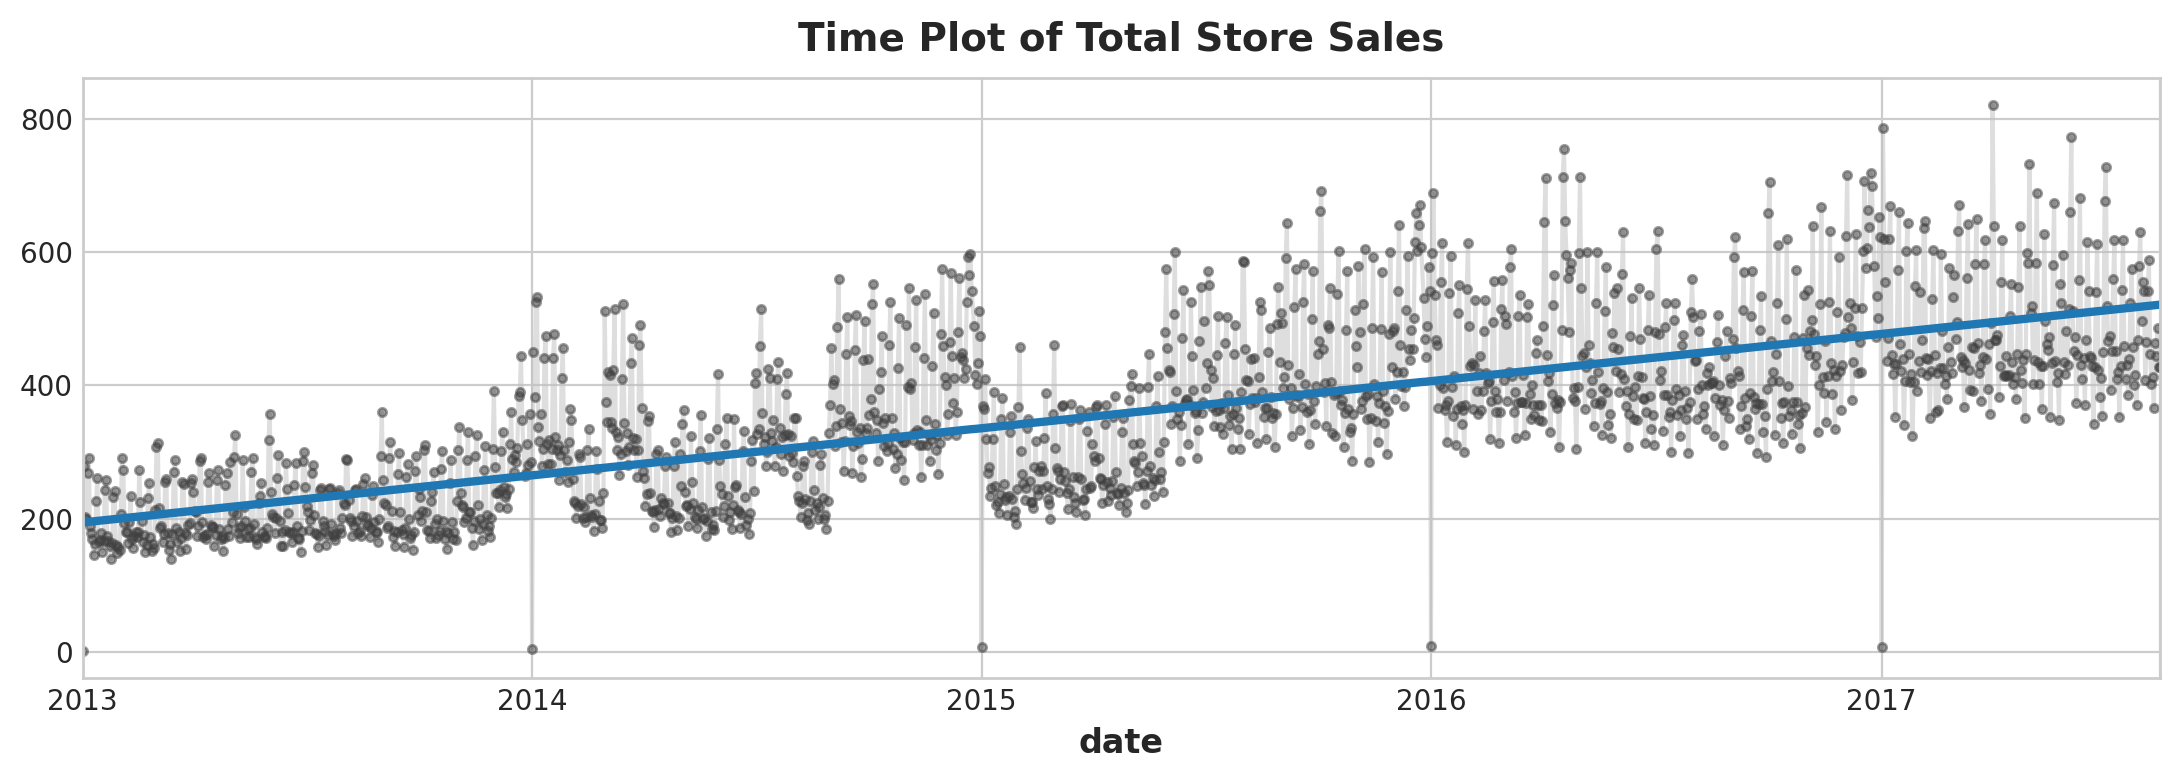

In [21]:
# Plot the Time Plot of Total Store Sales
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title("Time Plot of Total Store Sales");

**4) Fit a lag feature to Store Sales**    
create a linear regression model with a lag feature on the series of average product sales. The target is in a column of df called 'sales'.

In [22]:
df = average_sales.to_frame()

# YOUR CODE HERE: Create a lag feature from the target 'sales'
lag_1 = df['sales'].shift(1)

df['lag_1'] = lag_1  # add to dataframe

X = df.loc[:, ['lag_1']].dropna()  # feature(s), drop rows with NaN - df
y = df.loc[:, 'sales']  # target - Series
y, X = y.align(X, join='inner')  # drop correspinding values in target

# Create a LinearRegression instance and fit it to X, y
model = LinearRegression().fit(X,y)

# Create Store the fitted values as a time series with
# the same time index as the training data (X) - Convert the predicted
# result of array to a Series with the same index as X
y_pred = pd.Series(model.predict(X), index=X.index)

Coefficients: [0.76527363]
Intercept: 84.22308


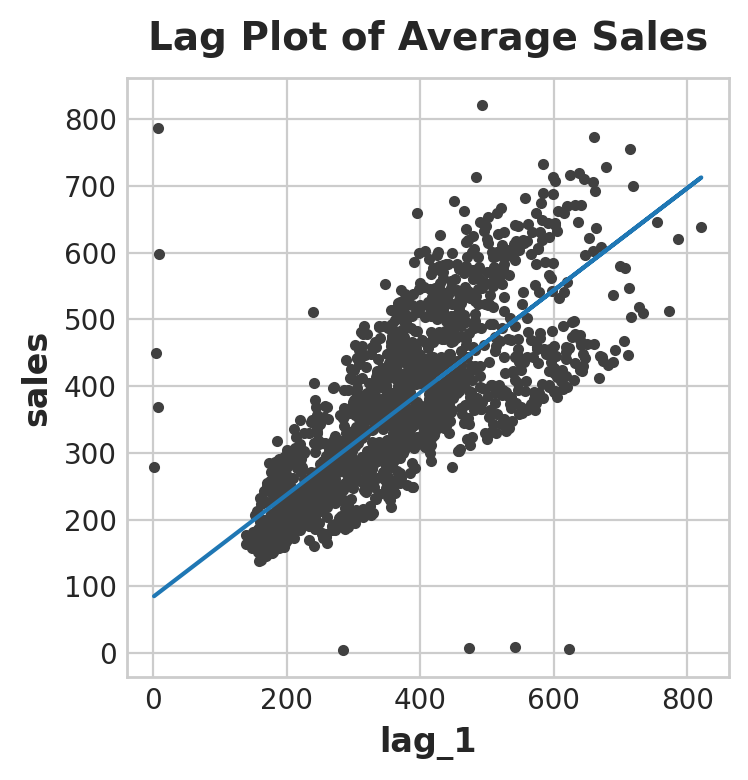

In [23]:
# plot the Lag Plot of Average Sales (axes in equal size)
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')  # actual data points
ax.plot(X['lag_1'], y_pred)  # regression line between actual and lag_1 predicted values
ax.set(aspect='equal',
      ylabel='sales',
      xlabel='lag_1',
      title='Lag Plot of Average Sales');

# Print the coefficient values and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 2. Trend

## What is Trend?   
The trend **component of a time series** represents a **persistent**, **long-term change** in the mean of the series. The trend is the **slowest-moving** part of a series, the part representing the **largest time scale** of importance. In a time series of product sales, an increasing trend might be the effect of a market expansion as more people become aware of the product year by year.    

> Any persistent and slow-moving change in a series could constitute a trend -- time series commonly have trends in their variation

### Moving Average plots

![Mauna Loa CO2](https://storage.googleapis.com/kaggle-media/learn/images/EZOXiPs.gif)

A moving average plot illustrating a linear trend. Each point on the curve (blue) is the average of the points (red) within a window of size 12 (12 years). To visualize a trend,we take an average over a period longer than any seasonal period in the series. For the Mauna Loa series, we chose a window of size 12 to smooth over the season within each year.

### Engineering Trend   
Once we've identified the shape of the trend, we can attempt to model it using a time-step feature. We've already seen how using the time dummy itself will model a linear trend:

`target = a * time + b` --> Typical linear trend

With **transformation of the time dummy**, We can fit many other kinds of trend through transformations of the time dummy. If the trend appears to be quadratic (a parabola), we just need to **add the square of the time dummy to the feature set**, giving us: - if trend identified to be quadratic, rather than linear.    
`target = a * time ** 2 + b * time + c`   
Linear regression will learn the coefficients a, b, and c.

**Top: Series with a linear trend, using LinearRegression from scikit-learn**   
**Below: Series with a quadratic trend, using LinearRegression from scikit-learn**
![](https://storage.googleapis.com/kaggle-media/learn/images/KFYlgGm.png)    

> **Linear regression** can fit **curves** other than lines. The idea is that if you can **provide curves of the appropriate shape as features**, then linear regression can **learn how to combine them in the way that best fits the target**.

### Example - Tunnel Traffic   
> Create a trend model for the Tunnel Traffic dataset

**Set up - modules, notebook, plot settings, data**

In [24]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period()  # set 'Day' as index for time series, and conver to Period
print(tunnel.head())

            NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569


**What kind of trend does the series have?**

             NumVehicles
Day                     
2003-11-01  99127.426230
2003-11-02  99094.489130
2003-11-03  99112.481081
2003-11-04  99146.639785
2003-11-05  99196.122995


<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}, xlabel='Day'>

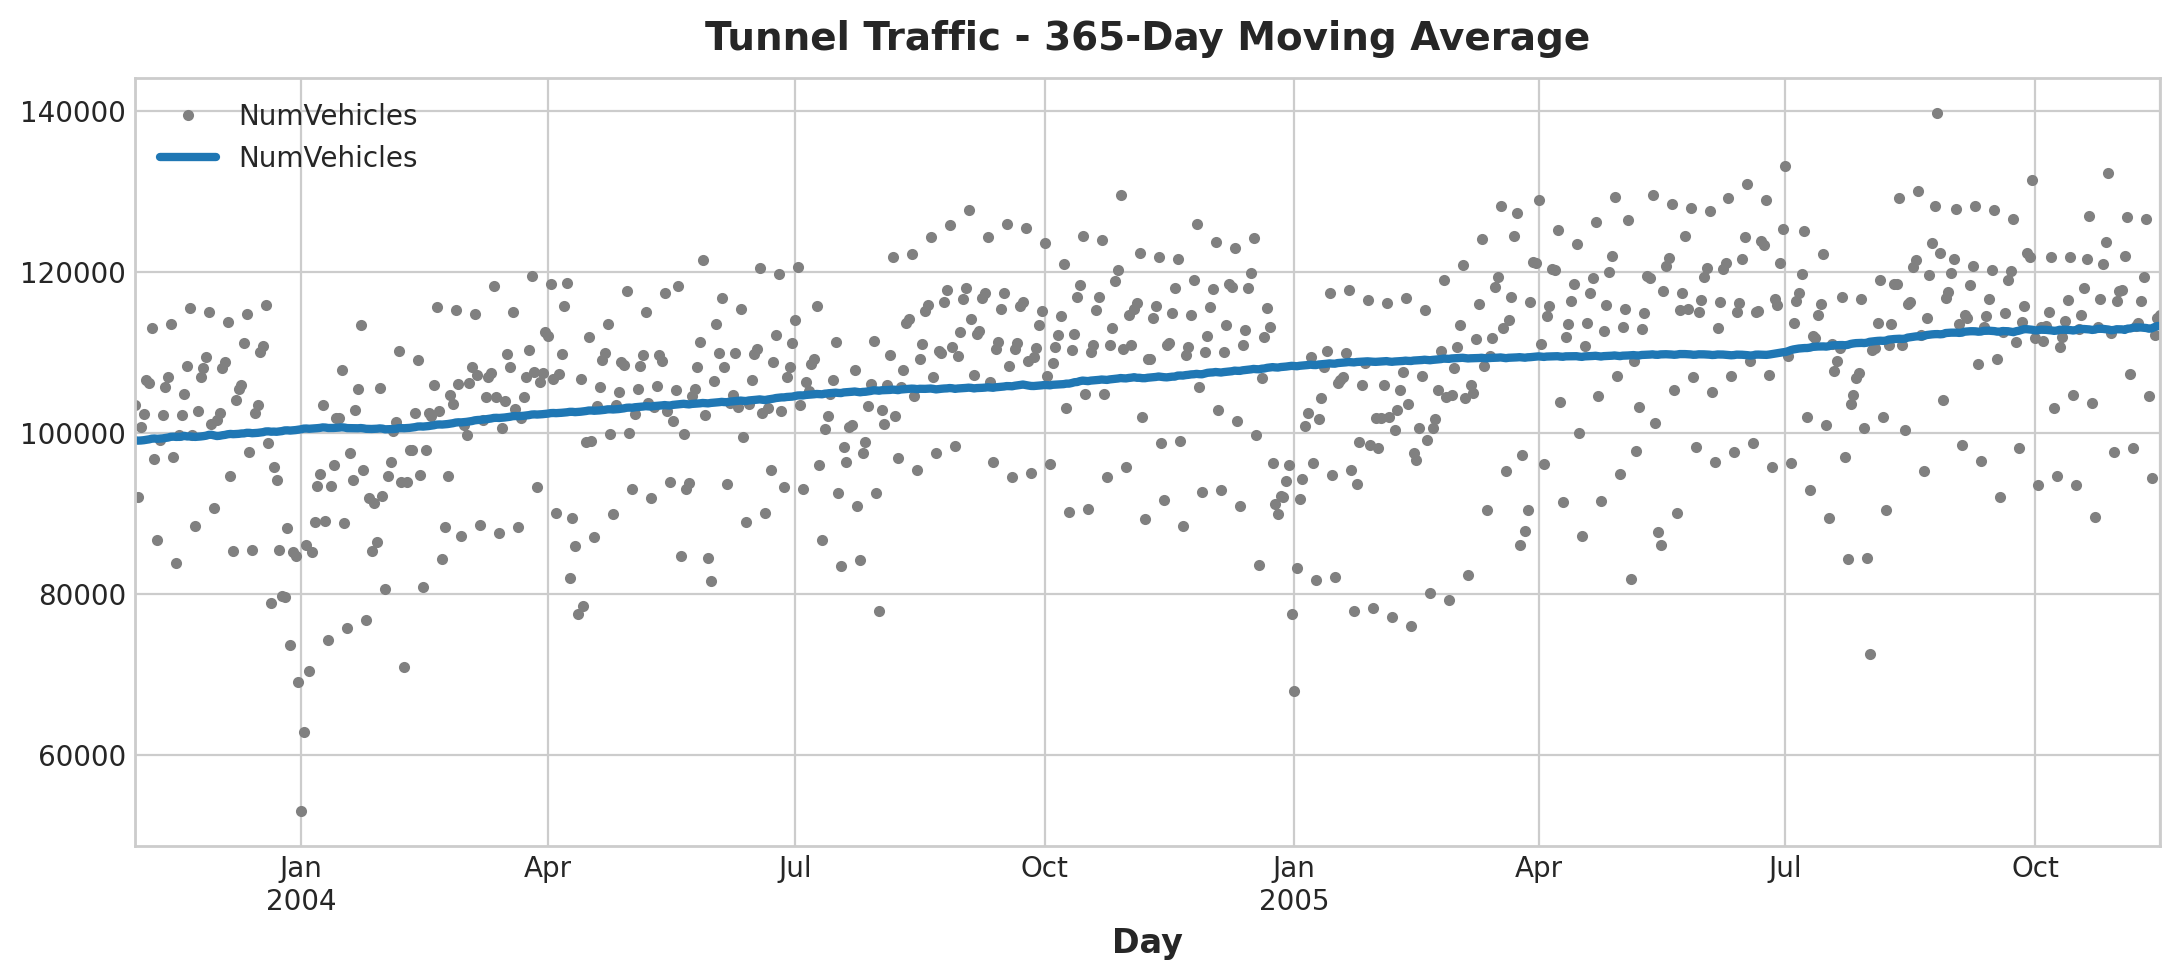

In [25]:
# identify the series trend by making moving average plot
# Data recordied daily, choose the series 'window' - 365 days
# Average plot will 'smooth over' any short term changes over the window

# df.rolling() method - returns df for moving avg values for each time unit in window
moving_average = tunnel.rolling(
    window=365,      # 365-day window
    center=True,      # puts the average at the center of window
    min_periods=183   # choose appx. half of window size
).mean()  # compute the mean(avg.) for this, others available - median, std, min, max ...
print(moving_average.head())

# plot the moving average with the original data points
ax = tunnel.plot(style=".", color="0.5")  # original data points
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=True,
)

As we can see, the trend of Tunnel Traffic appears to be about linear.

**Switch** to `DeterministicProcess` library from **statsmodels**   
Stop creating time dummy using Pandas directory. avoid some tricky failure cases that can arise with time series and linear regression   
DeterministicProcess, the abbreviation "tsa" stands for "Time Series Analysis." Time Series Analysis is a statistical method used for analyzing and modeling data that are ordered and indexed by time, such as stock prices, temperature readings, sales data, etc. Time series data often exhibit temporal dependencies and patterns that are crucial for making predictions and understanding underlying trends.

The statsmodels.tsa.deterministic module in the StatsModels library provides functionalities related to deterministic processes in time series analysis. A deterministic process refers to a time series where the future values are completely determined by the past observations and are not subject to random fluctuations.

The DeterministicProcess class is a part of the statsmodels.tsa.deterministic module. It is commonly used to create and handle deterministic components in time series models. Deterministic components are time-varying variables or terms that can be explicitly modeled in the time series analysis. They are not random but rather follow a specific deterministic pattern.

Deterministic components are often used in time series modeling to represent known or systematic patterns in the data, such as trends, seasonality, and periodic effects. By incorporating deterministic components into the model, one can separate the systematic patterns from the random or stochastic components of the time series.

For example, if you have time series data representing monthly sales over several years, you might want to incorporate a deterministic component for seasonality (e.g., monthly seasonality) to capture the repetitive patterns that occur at fixed intervals each year.

The DeterministicProcess class provides methods to construct deterministic terms based on various patterns and frequencies, which can then be included in time series models such as ARIMA (AutoRegressive Integrated Moving Average) models or SARIMA (Seasonal AutoRegressive Integrated Moving Average) models. By explicitly accounting for these deterministic patterns, the time series models can make more accurate predictions and improve forecasting performance.


In [26]:
from statsmodels.tsa.deterministic import DeterministicProcess

# Create features - const, trend
dp = DeterministicProcess(
    index=tunnel.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # 1:linear(time dummy) 2: quadratic 3: cubic ...
    drop=True,           # drop terms if necessary to avoid collinearity
)

X = dp.in_sample() # create features for the given index= argument, here, tunnel_index
print(X.head()) # const - intercept, trend - 


# Build a LinearRegression model,
# Use the features from DeterministicProcess
# Set fit_intercept=False
from sklearn.linear_model import LinearRegression

y = tunnel['NumVehicles'] # the target
# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with 
# duplicated features, so make sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
print(y_pred.head())
print(y_pred.tail())


            const  trend
Day                     
2003-11-01    1.0    1.0
2003-11-02    1.0    2.0
2003-11-03    1.0    3.0
2003-11-04    1.0    4.0
2003-11-05    1.0    5.0
Day
2003-11-01    98176.206344
2003-11-02    98198.703794
2003-11-03    98221.201243
2003-11-04    98243.698693
2003-11-05    98266.196142
Freq: D, dtype: float64
Day
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, dtype: float64


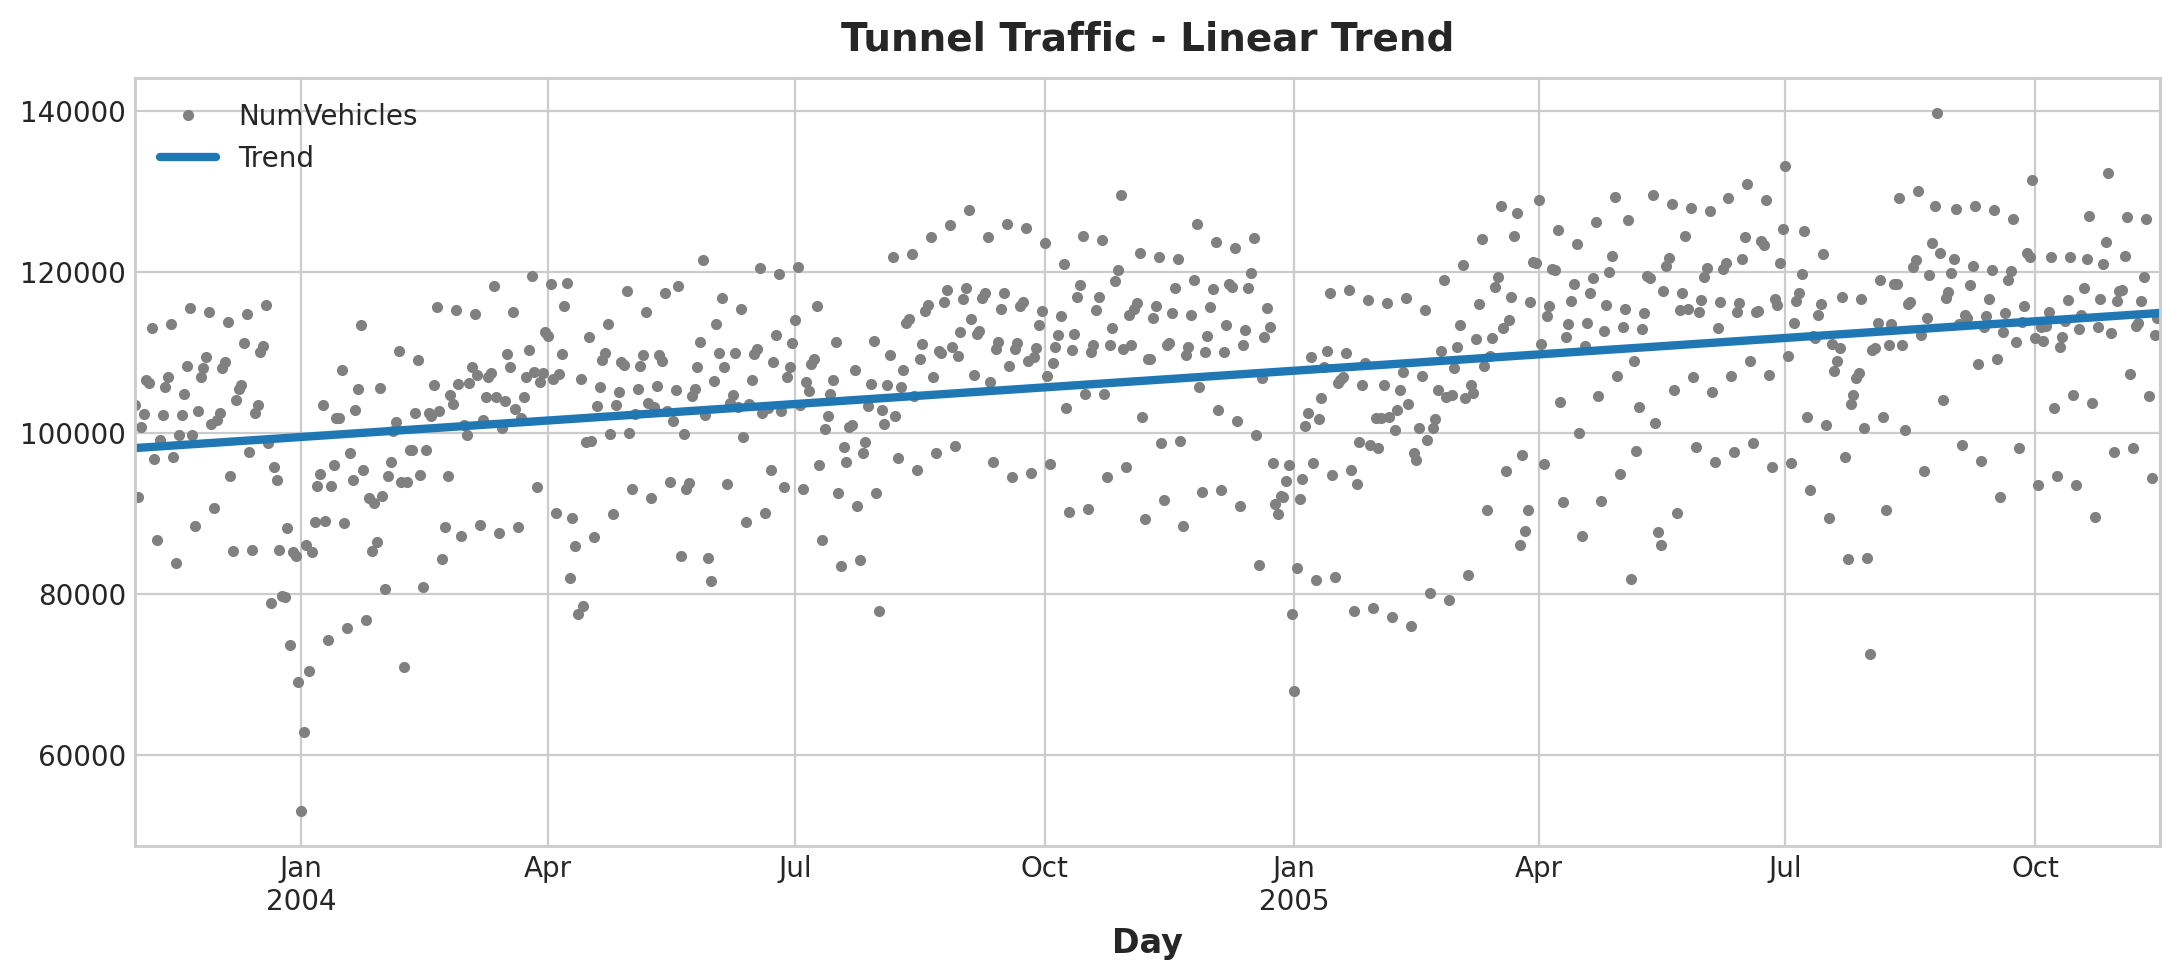

In [27]:
# plot the trend discovered by LinearRegression model.
ax = tunnel.plot(style=".",
                 color="0.5", 
                 title="Tunnel Traffic - Linear Trend") # original data points
_ = y_pred.plot(ax=ax, linewidth=3, label='Trend', legend=True)

The trend discovered by our LinearRegression model is almost identical to the moving average plot, which suggests that a **linear trend was the right decision** in this case.

**Now, make a Forecast!**   
1. The model is verified and ready.   
1. Apply it to "out of sample" - times outside of the observation period of the training data.    
1. Create a 30-day forecast

In [28]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X), index=X.index)
print(y_fore.head())

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64


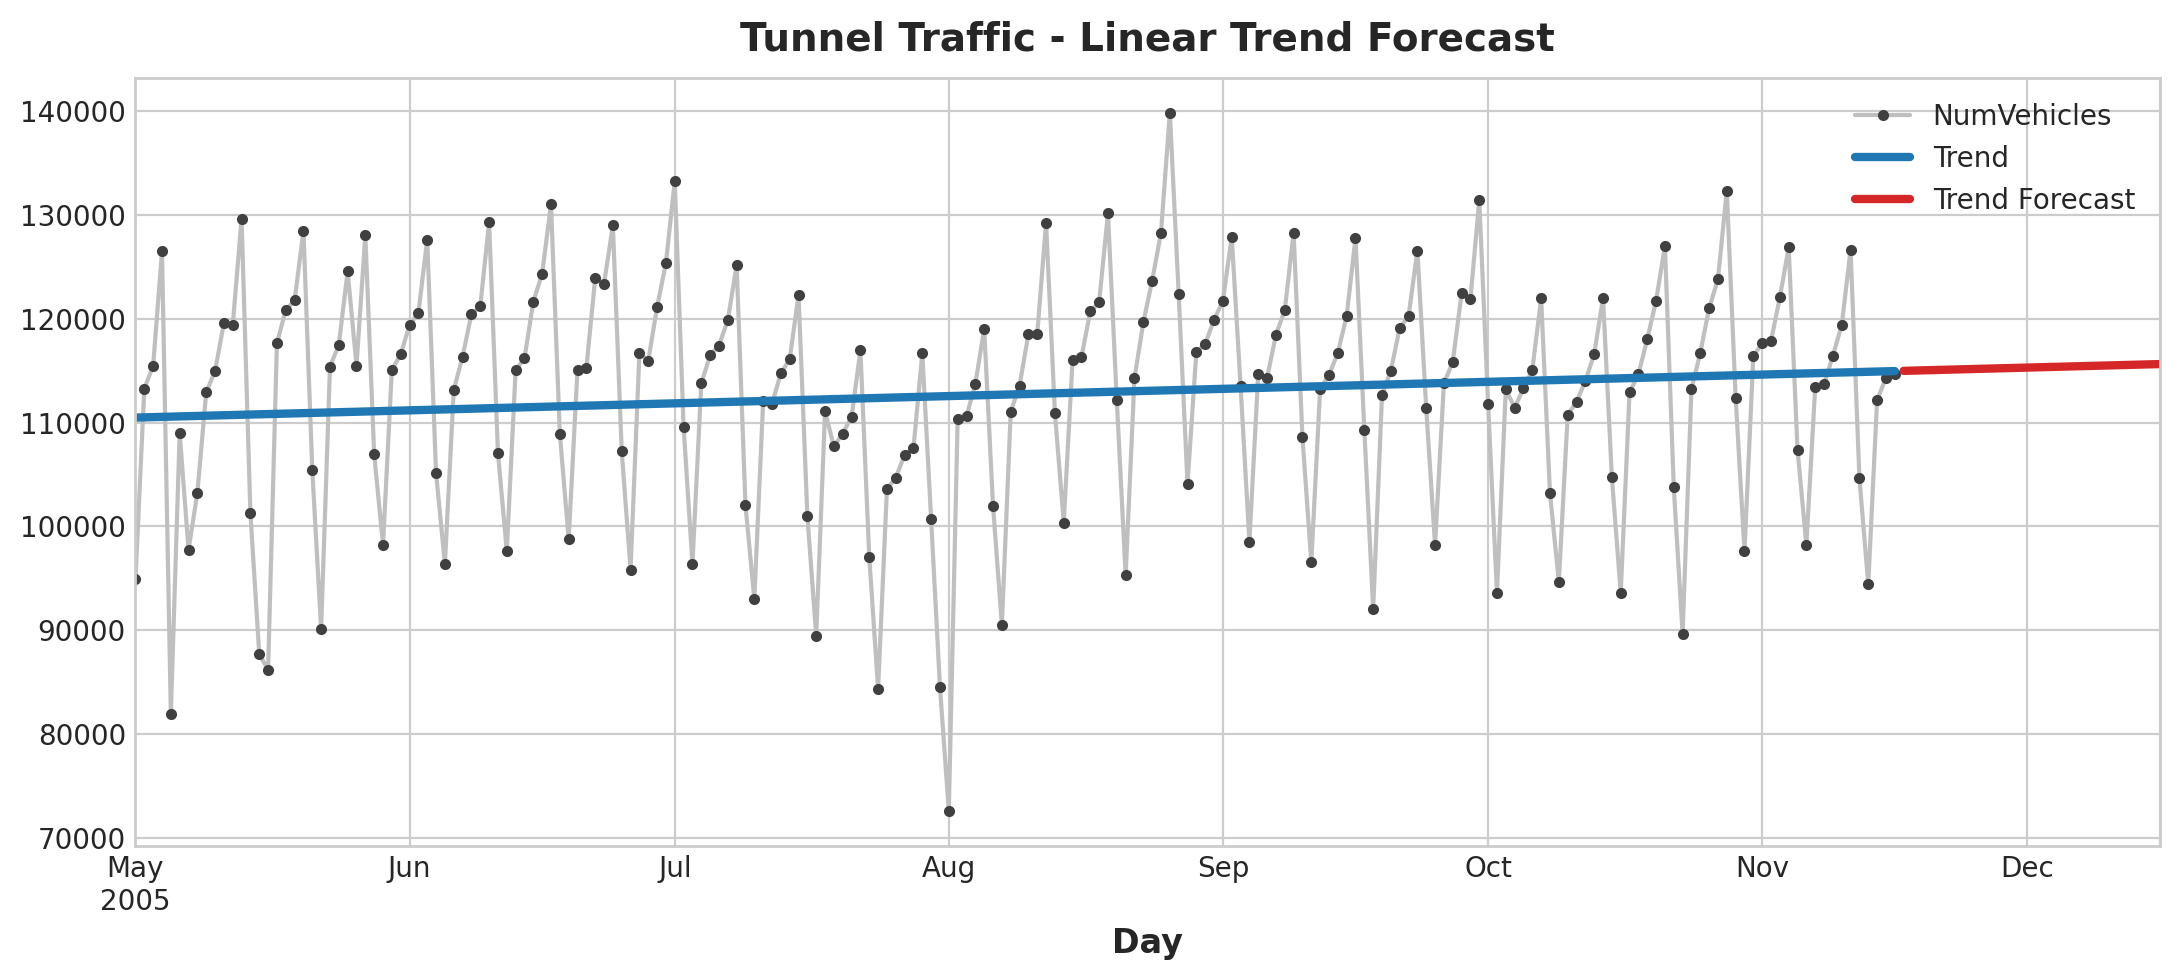

In [29]:
# plot a portion of the series to see the trend forecast for the next 30 days.
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)  # original data points
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")  # trend prediction from LinearRegression
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")  # 30-day trend forecast
_ = ax.legend()  # add legend

In [30]:
tunnel

NumVehicles
Day                    
2003-11-01       103536
2003-11-02        92051
2003-11-03       100795
2003-11-04       102352
2003-11-05       106569
...                 ...
2005-11-12       104646
2005-11-13        94424
2005-11-14       112165
2005-11-15       114296
2005-11-16       114690

[747 rows x 1 columns]

> **Collinearity**, also known as multicollinearity, is a phenomenon in linear regression and other regression-based models where two or more independent variables (predictors) are highly correlated with each other. In other words, collinearity occurs when there is a strong linear relationship between two or more predictor variables.

> Collinearity can cause issues in regression analysis because it violates the assumption that the predictor variables should be independent of each other. When collinearity is present, it becomes challenging to distinguish the individual effects of each predictor on the dependent variable (outcome variable). The coefficients of the predictors may become unstable, and the model may produce misleading or unreliable results.

> There are two main types of collinearity:

> Perfect Collinearity: This occurs when two or more predictor variables are perfectly correlated, meaning they have a correlation coefficient of ±1. In this case, the predictor variables are linearly dependent, and it becomes impossible to estimate separate regression coefficients for each variable.

> High Collinearity: This occurs when two or more predictor variables are highly correlated but not perfectly correlated. Although the correlation is not exactly ±1, it is strong enough to cause issues in the regression analysis.

> Collinearity can be problematic in several ways:

> It can inflate the standard errors of the regression coefficients, making them imprecise and reducing the power of the statistical tests.
It can lead to unstable coefficient estimates, meaning small changes in the data can result in significant changes in the model's output.
It can make it difficult to interpret the individual effects of predictor variables on the dependent variable since their effects may be confounded by collinearity.
To address collinearity, researchers can take the following steps:

> Identify and diagnose collinearity using correlation matrices, variance inflation factors (VIF), or other diagnostic methods.
Remove or combine highly correlated predictor variables.
Use regularization techniques, such as Ridge regression or Lasso regression, which can help mitigate the impact of collinearity.
Use domain knowledge or expert judgment to decide which predictors are most relevant and keep only those in the model.
By addressing collinearity appropriately, researchers can improve the accuracy and reliability of their regression models and better understand the relationships between the predictor variables and the outcome variable.

### Exercise: Trend


Setup

In [31]:
# modules
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

data_dir = Path('../input/ts-course-data/')
comp_dir = Path('../input/store-sales-time-series-forecasting')

retail_sales = pd.read_csv(
    data_dir / "us-retail-sales.csv",
    parse_dates=['Month'],
    index_col='Month',
).to_period('D')
food_sales = retail_sales.loc[:, 'FoodAndBeverage']
auto_sales = retail_sales.loc[:, 'Automobiles']

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
store_sales = pd.read_csv(
    comp_dir / 'train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

In [32]:
print("\nRetail_sales_________________\n", retail_sales.head())
print("\nFood_sales___________________\n", food_sales.head())
print("\nAuto_sales___________________\n", auto_sales.head())
print("\nStore_sales__________________\n", store_sales.head())


Retail_sales_________________
             Clothing  Appliances  FoodAndBeverage  Automobiles  \
Month                                                            
1992-01-01      6938        3657            29589        26788   
1992-02-01      7524        3490            28570        28203   
1992-03-01      8475        3669            29682        31684   
1992-04-01      9401        3527            30228        32547   
1992-05-01      9558        3571            31677        32883   

            GeneralMerchandise  BuildingMaterials  
Month                                              
1992-01-01               14996               8964  
1992-02-01               16015               9023  
1992-03-01               17984              10608  
1992-04-01               18872              11630  
1992-05-01               20037              12327  

Food_sales___________________
 Month
1992-01-01    29589
1992-02-01    28570
1992-03-01    29682
1992-04-01    30228
1992-05-01    31677
Fre

**1) Determine trend with a moving average plot**   
The US Retail Sales dataset contains monthly sales data for a number of retail industries in the United States.

[Text(0.5, 1.0, 'US Food and Beverage Sales'),
 Text(0, 0.5, 'Millions of Dollars')]

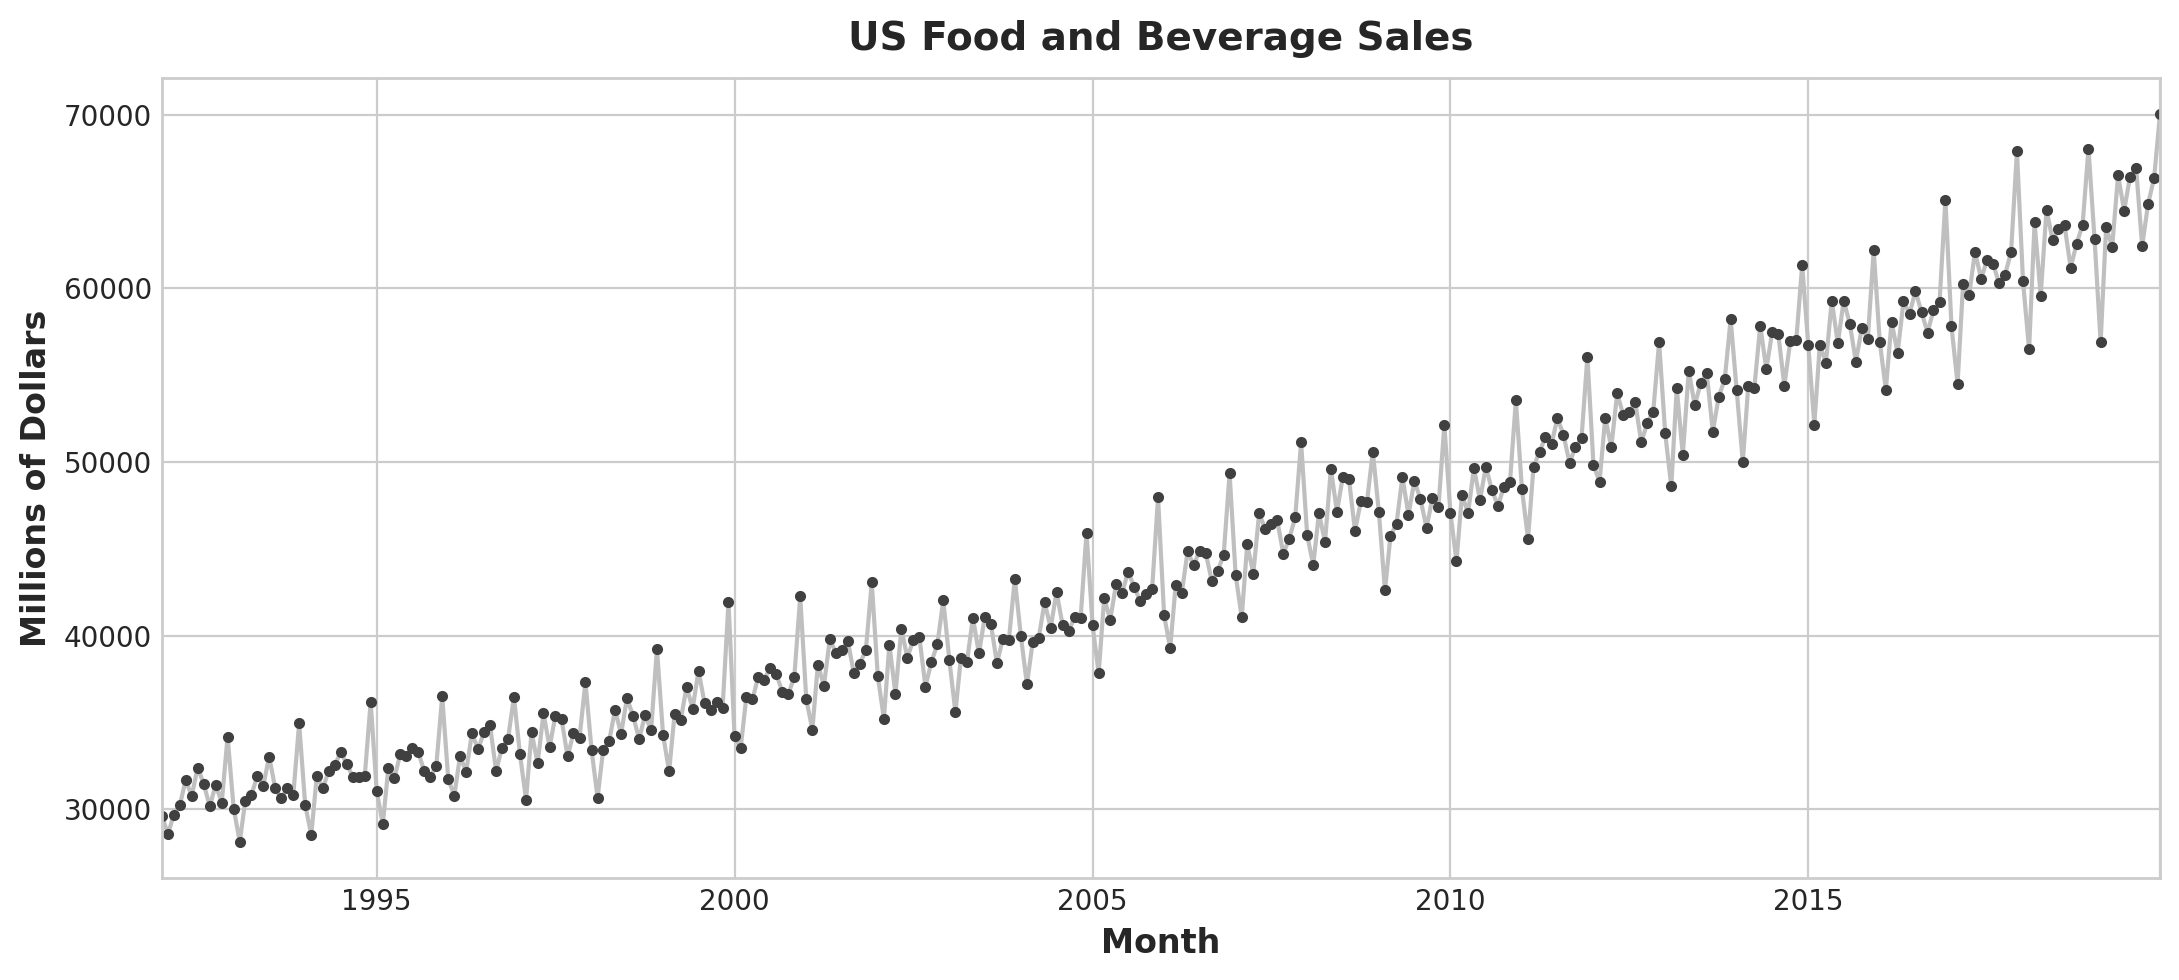

In [40]:
# Plot the Food and Beverage series

#ax = food_sales.plot()
ax = food_sales.plot(**plot_params)
ax.set(title="US Food and Beverage Sales", ylabel="Millions of Dollars")

Month
1992-01-01    30085.833333
1992-02-01    30416.714286
1992-03-01    30548.250000
1992-04-01    30505.333333
1992-05-01    30595.500000
Freq: D, Name: FoodAndBeverage, dtype: float64


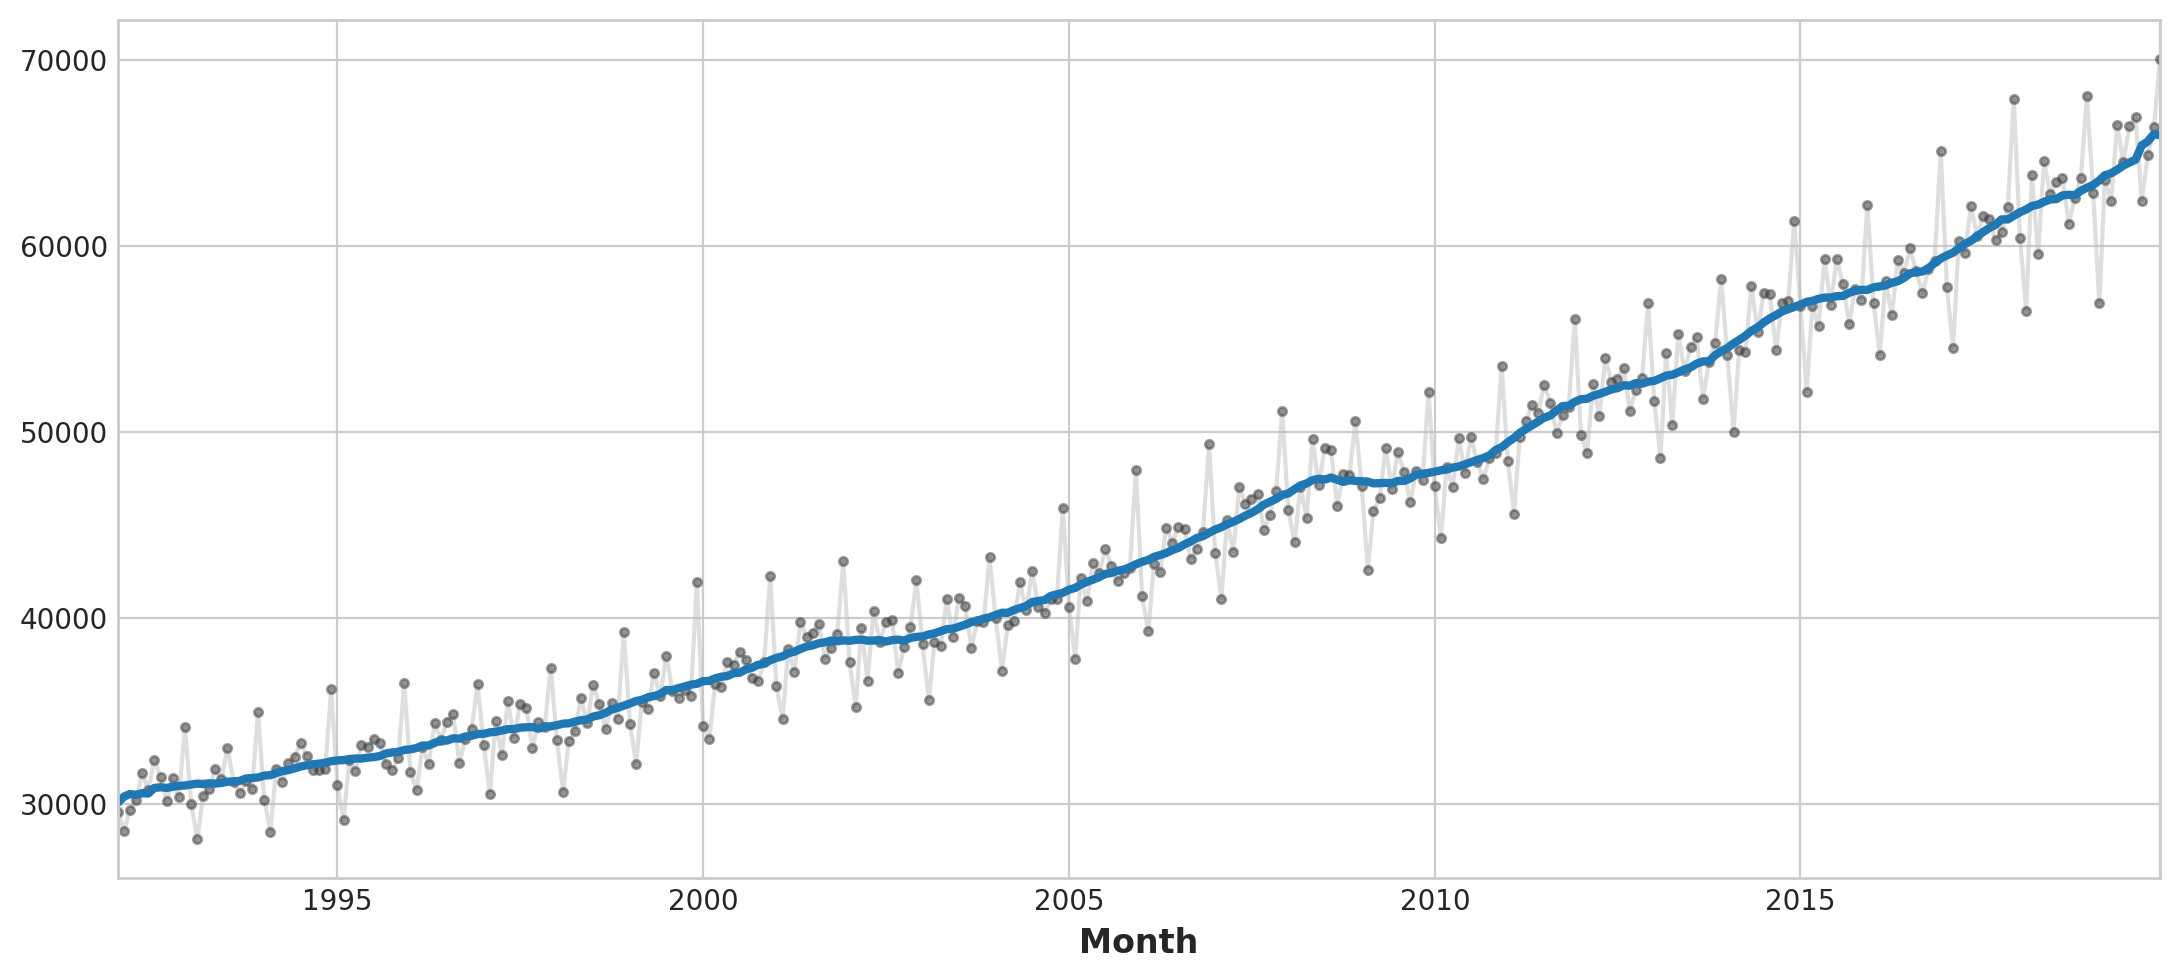

In [42]:
# Estimate the trend using moving average

# compute moving average on FoodAndBeverage
trend = food_sales.rolling(
    window=12,              
    center=True,                         
    min_periods=6 
).mean()  # compute the mean(avg.) for this, others available - median, std, min, max ...
print(trend.head())

# Plot the trend line of Moving Average
ax = food_sales.plot(**plot_params, alpha=0.5)  # original data potins.
ax = trend.plot(ax=ax, linewidth=3)             # add line of moving average

**2) Identify trend**    
What order polynomial trend might be appropriate for the Food and Beverage Sales series? Can you think of a non-polynomial curve that might work even better?    
> The upwards bend in the trend suggests an order 2 (quadratic) polynomial might be appropriate.

> If you've worked with economic time series before, you might guess that the growth rate in Food and Beverage Sales is best expressed as a percent change. Percent change can often be modeled using an exponential curve. (Don't worry if this isn't familiar!)

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911163
2013-01-05    267.873260
Freq: D, Name: sales, dtype: float32
date
2013-01-01    204.008240
2013-01-02    204.041816
2013-01-03    203.930850
2013-01-04    203.894636
2013-01-05    204.243262
Freq: D, Name: sales, dtype: float64


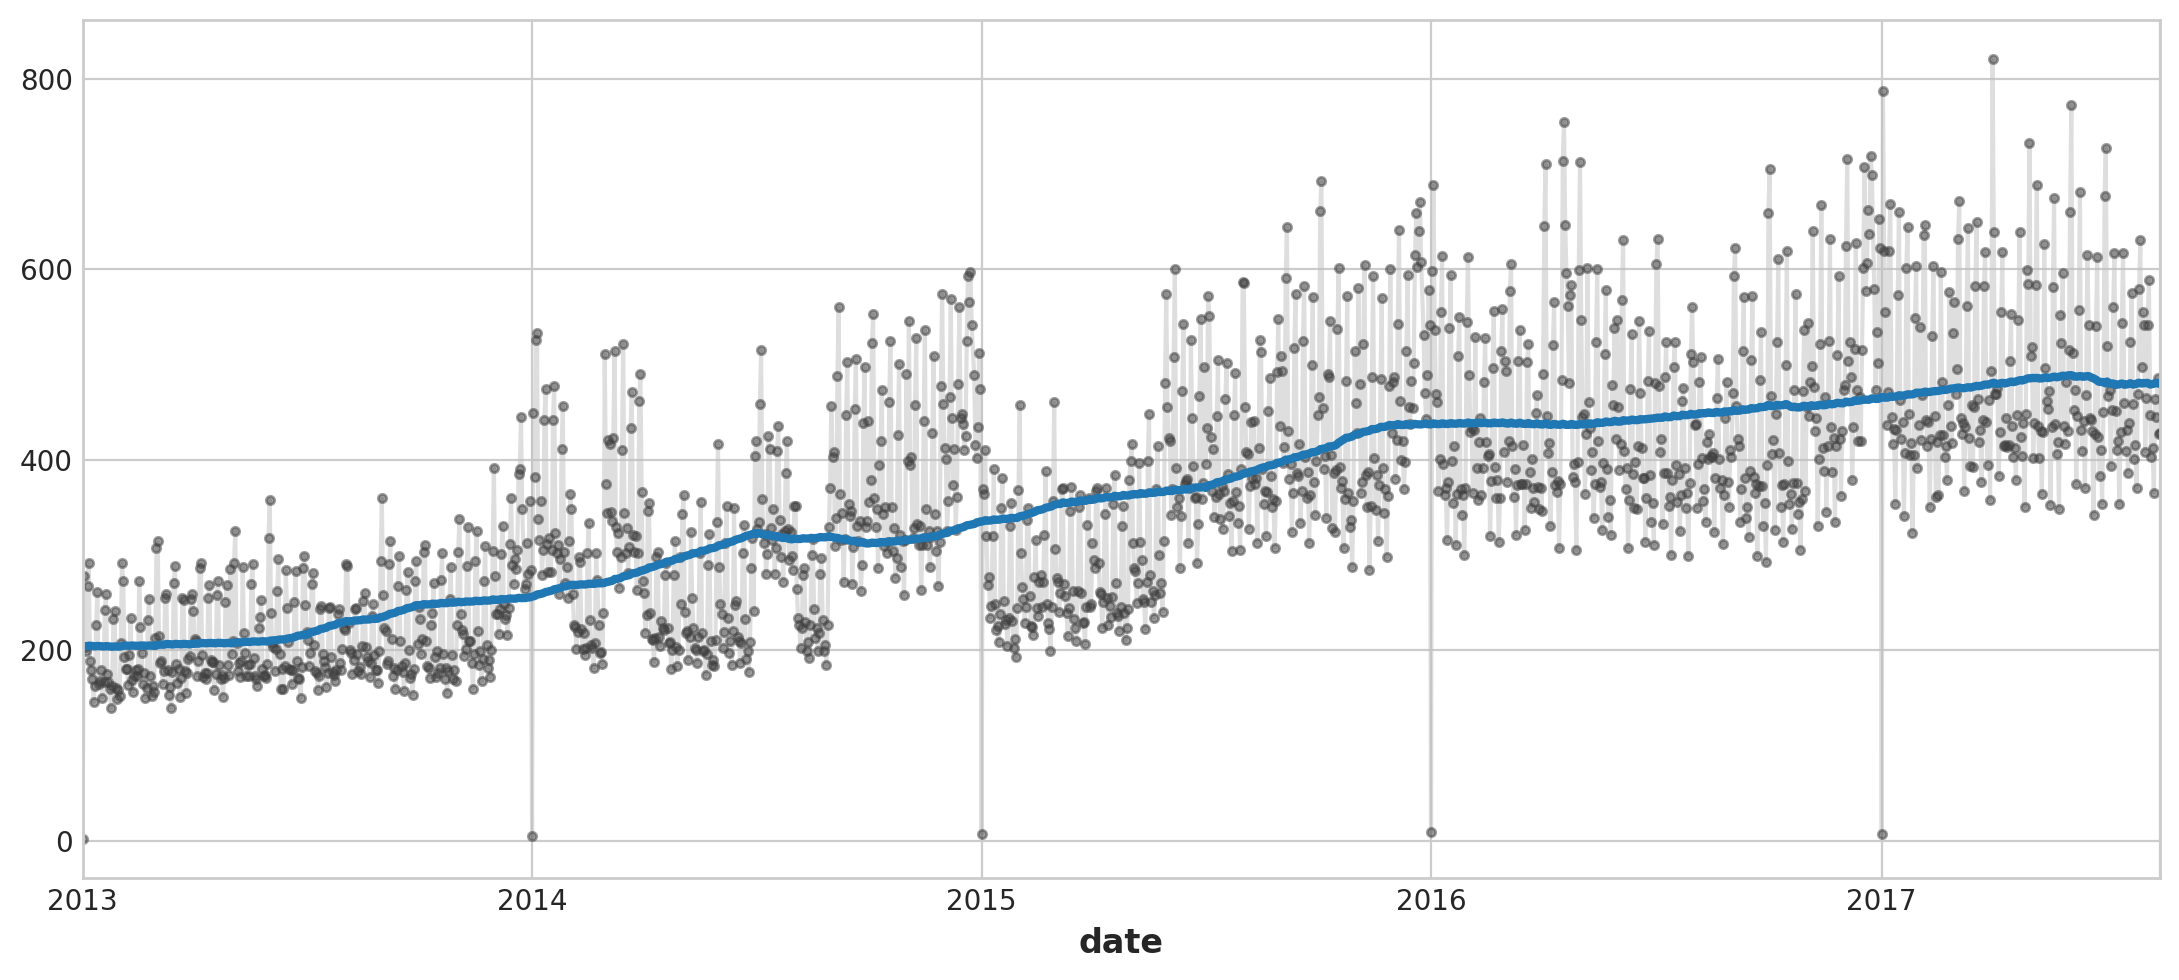

In [52]:
# Plot the trend of 'moving average' on 'average_sales' dataset
trend = average_sales.rolling(
    window=365,      # period of 365-day for caculation
    center=True,
    min_periods=183,
).mean()
print(average_sales.head())
print(trend.head())

ax = average_sales.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

**Create Trend Features**  
* Use dataset `average_sales`
* Use `DeterministicProcess` from `statsmodels`
* Create feature set for **cubic trend model**
* Create feature set for a **90-day forecast**

In [54]:
print(average_sales.head())
print(average_sales.index)

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911163
2013-01-05    267.873260
Freq: D, Name: sales, dtype: float32
PeriodIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
             '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
             '2013-01-09', '2013-01-10',
             ...
             '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
             '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
             '2017-08-14', '2017-08-15'],
            dtype='period[D]', name='date', length=1684)


In [83]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = average_sales.copy()  # target 

# Create features for cubic model using DeterministicProcess
dp = DeterministicProcess(
    index=y.index,   # time serise index used in y
    constant=True,   # defulat is True
    order=3,         # for cubic model
    drop=True
)
X = dp.in_sample()    # feature set creation

# Create feature set for 90-day forecast
X_fore = dp.out_of_sample(steps=90)


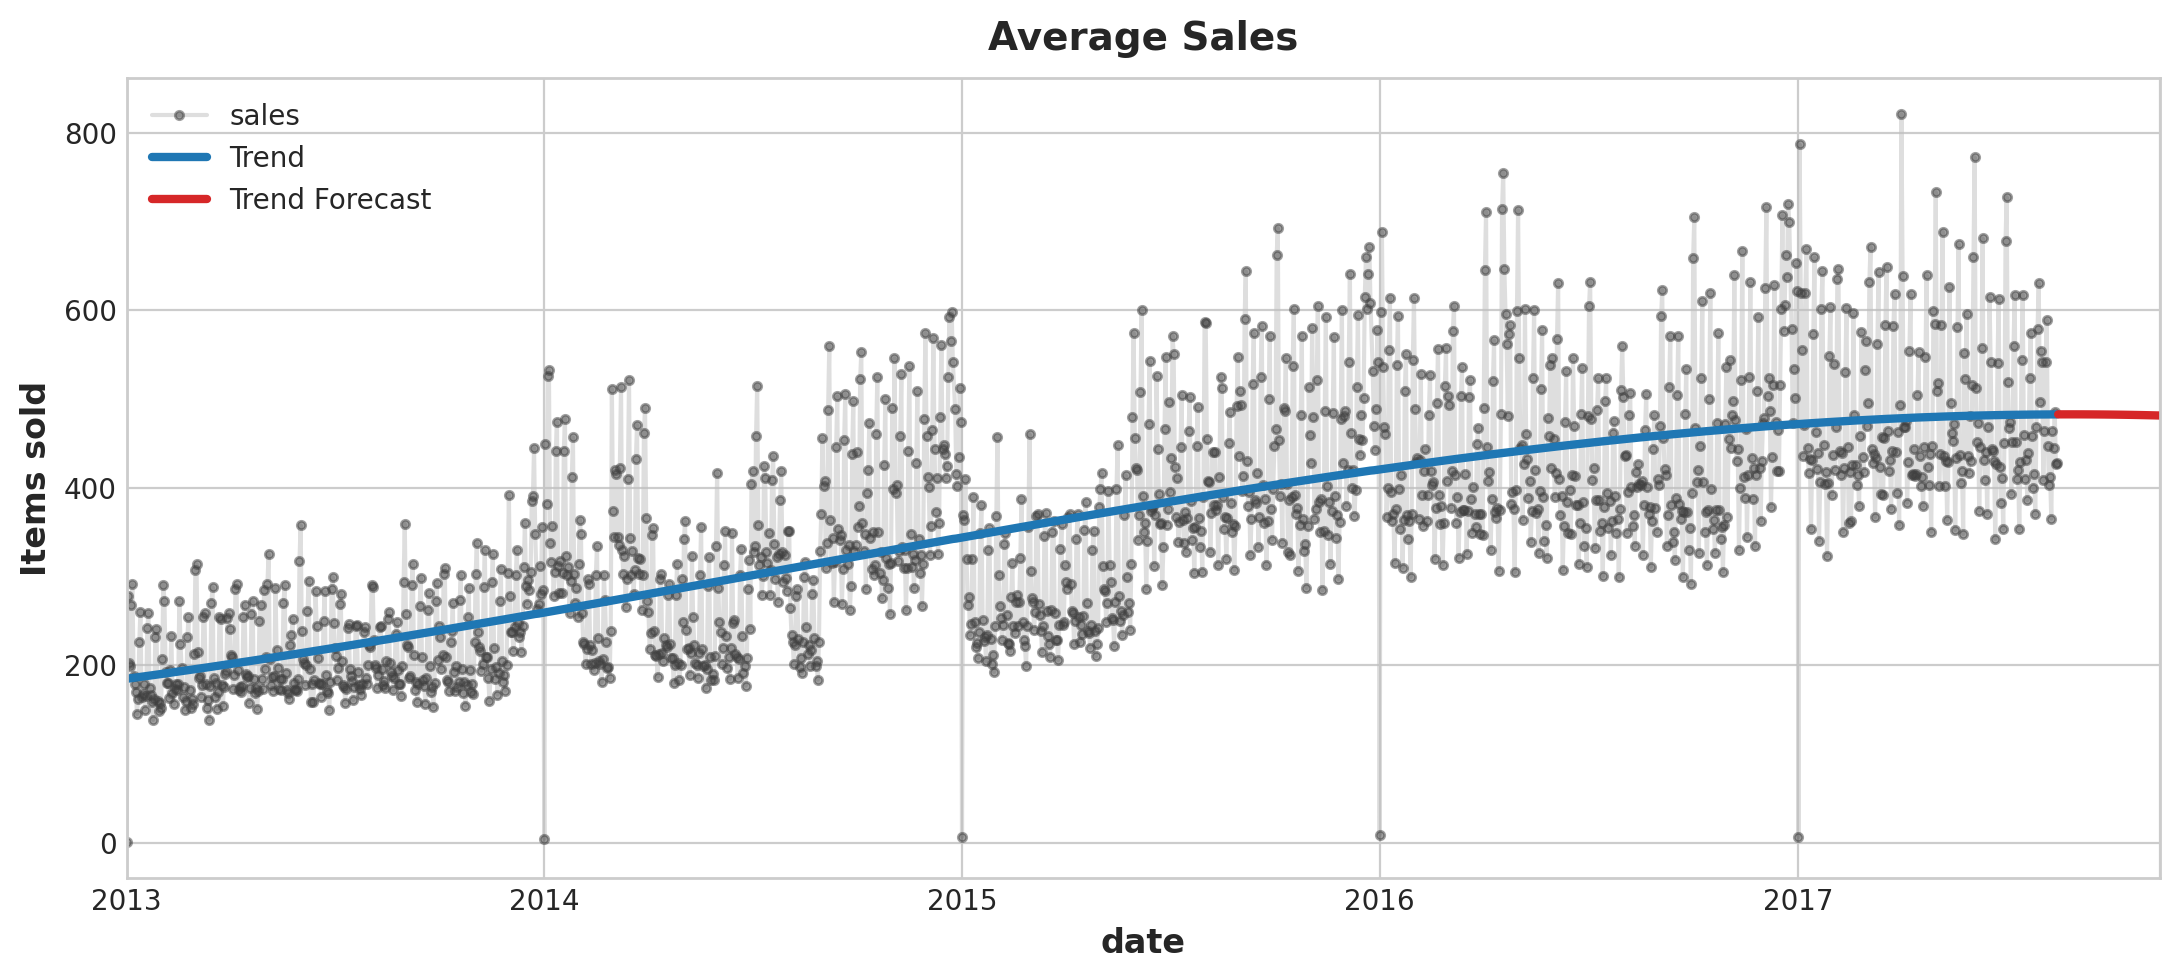

In [84]:
# Plot the data points, line from cubic model and 90-day forecast line

# model
model = LinearRegression()
model.fit(X, y)

# prediction
y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

# plotting
# - original data points
ax = y.plot(**plot_params, alpha=0.5, title='Average Sales', ylabel='Items sold')
# - add trend line from LinearRegression
ax = y_pred.plot(ax=ax, linewidth=3, label='Trend', color='C0')
# - add forecast line from LinearRegression
ax = y_fore.plot(ax=ax, linewidth=3, label='Trend Forecast', color='C3')
ax.legend();

One way to fit more complicated trends is to increase the order of the polynomial you use. To get a better fit to the somewhat complicated trend in Store Sales, we could try using an order 11 polynomial.

By increasing the polynomial order to 11, the feature set created by DeterministicProcess would include terms up to x^11 (where x represents time steps or indices), enabling the model to represent more intricate shapes and capture intricate patterns in the data. This higher-order polynomial will allow the model to approximate a wider range of curve shapes and adjust to the fluctuations present in the time series.

It's important to note that while a higher-order polynomial can provide a better fit to the training data, it may also introduce the risk of overfitting, especially with limited data points. Overfitting occurs when the model becomes too tailored to the training data and may not generalize well to unseen data or future predictions. Therefore, when increasing the polynomial order, it is essential to evaluate the model's performance on validation data to ensure it is not overly complex and still generalizes well to new data points. A balance should be struck between capturing the complexity of the trend and maintaining a good level of generalization

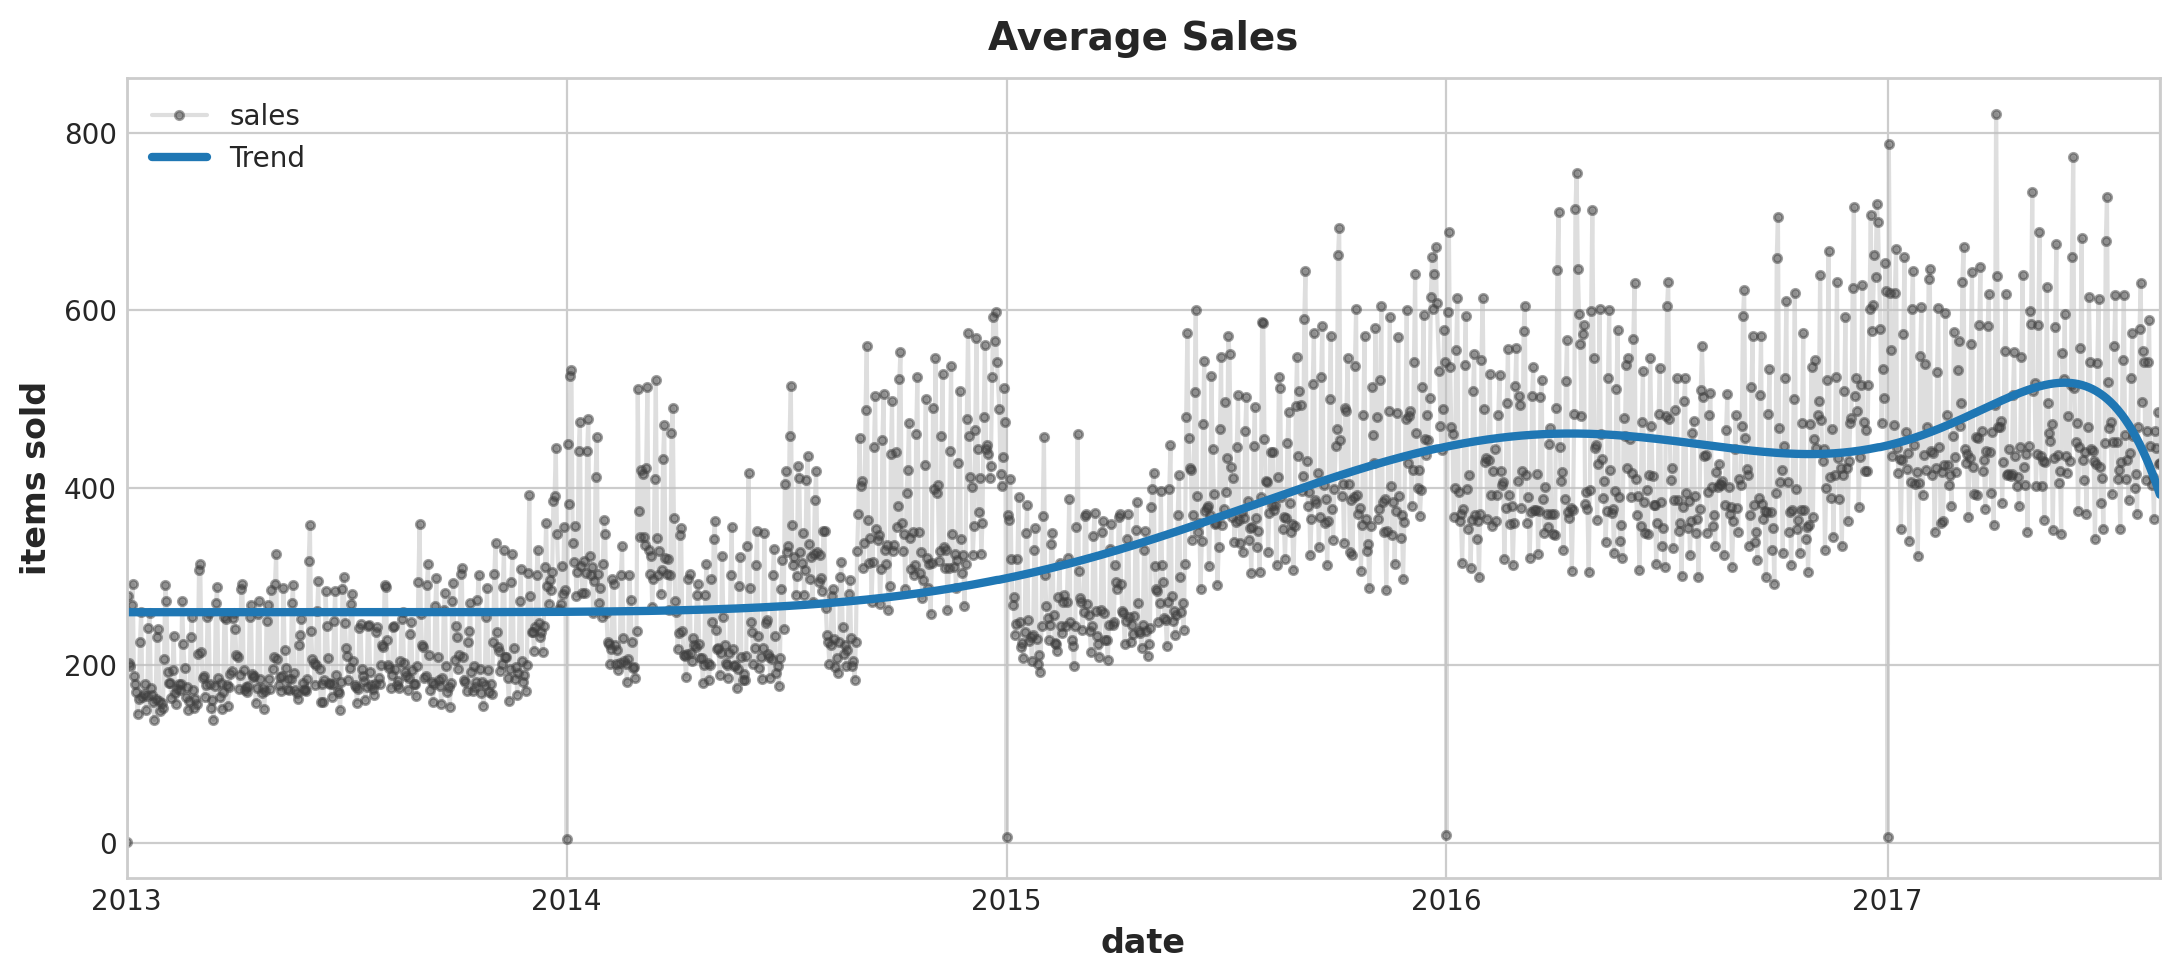

In [93]:
# model with polynomial order=11

from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=y.index, order=11)
X = dp.in_sample()

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax.legend();

**4) Understand risks of forecasting with high-order polynomials**    
High-order polynomials are generally not well-suited to forecasting, however. Can you guess why?     
> What could you say about the **rate of change** of a term like `t ** 11` over a long period of time? An order 11 polynomial will include terms like `t ** 11`. Terms like these tend to **diverge rapidly outside of the training period** making forecasts very unreliable.

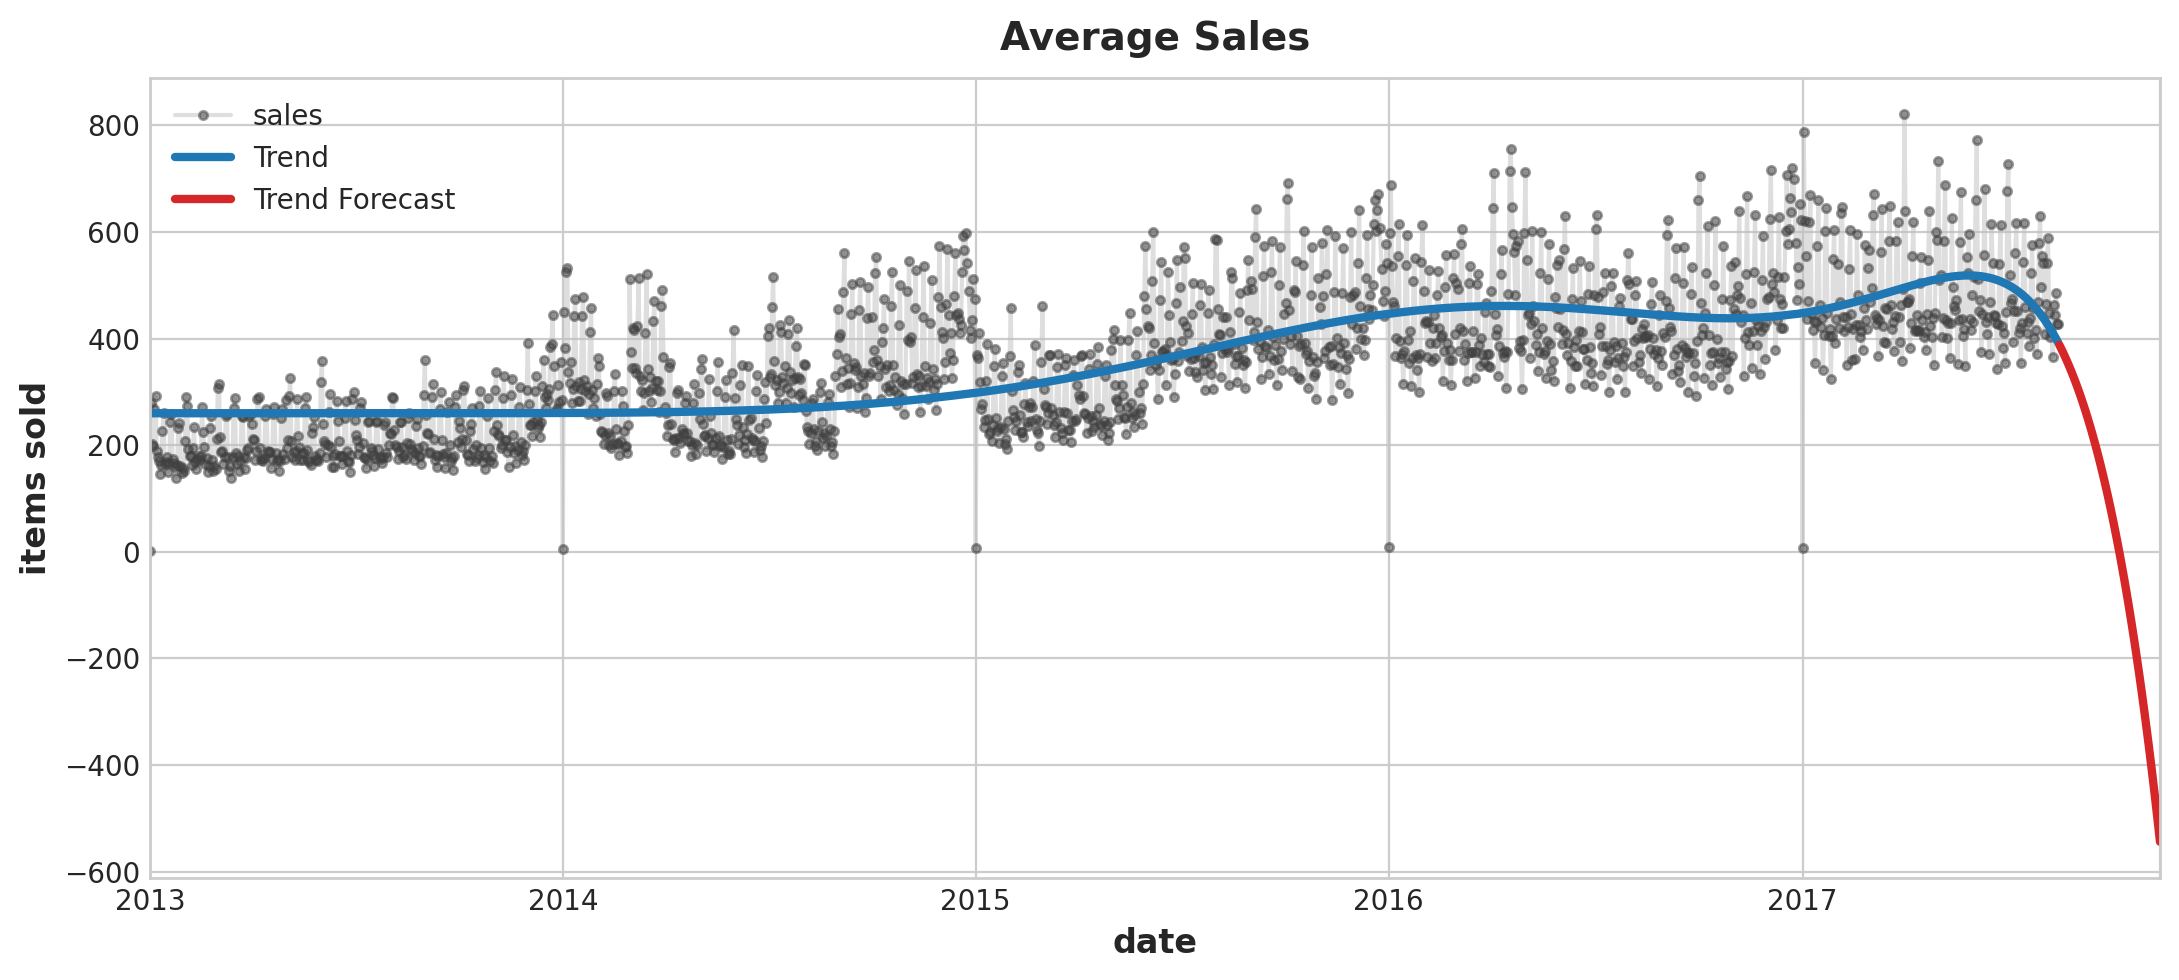

In [94]:
# Run the same 90-day forecast using an order 11 polynomial.
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();